In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import tqdm

sns.set(color_codes=True)

import py_auc

sg = py_auc.Score_generator()

In [22]:
# total number 
n_list = [1000, 10000, 1000000]

# rho number
rho_list = [0.25, 0.5, 0.75]

# mu number
mu0_list = [0]
mu1_list = [1, 2, 3, 4, 6]
std0_list = [1, 2]
std1_list = [1, 2]
#dist_list = [[1, 0, 1, 1], [1, 0, 2, 2], [2, 0, 1, 1], [2, 0, 2, 2], 
#             [3, 0, 1, 1], [3, 0, 2, 2], [4, 0, 1, 1], [4, 0, 2, 2],
#             [5, 0, 1, 1], [5, 0, 2, 2], [6, 0, 1, 1], [6, 0, 2, 2]]
#dist_list = [[1, 0, 2, 2], [2, 0, 2, 2], 
#             [3, 0, 2, 2], [4, 0, 2, 2],
#             [5, 0, 2, 2], [6, 0, 2, 2]]
dist_list = [[1, 0, 2, 2], [3, 0, 2, 2], [5, 0, 2, 2]]

# shape 
#shape_list = ['gaussian', 'triangle', 'uniform']
shape_list = ['gaussian']
#shapen_list = [0, 1, 2]
shapen_list = [0]

# sampling
sampling_ratio_list = [0.1, 0.2, 0.3, 0.5, 0.7]
#sampling_repeat_list = [100, 200, 300, 400, 500]
sampling_repeat_list = [100, 300, 500]

# repeat number
repeat_list = [0, 1, 2, 3, 4]

In [23]:
# data frame for simulation summary

colnames = ['n', 'n1', 'shape1', 'mu1', 'std1', 'n0', 'shape0', 'mu0', 'std0', 'rho', 
            'auc_delta', 'auc_delta_time', 'auc_bac', 'auc_bac_time', 'auc_sk', 'auc_sk_time', 
            'aupr_pre', 'aupr_pre_time', 'aupr_sk', 'aupr_sk_time', 
            'sampling_size', 'sampling_repeats', 'sampling_ratio', 'auc_delta_sample', 
            'auc_bac_sample', 'auc_bac_sample_time', 'aupr_pre_sample', 'aupr_pre_sample_time', 
            'repeat#', 'done']

data = np.zeros((50000, len(colnames)))
n_sampling_cases = len(sampling_ratio_list)*len(sampling_repeat_list)*len(repeat_list)
i = 0

for n in n_list:
    for rho in rho_list:
        for dist in dist_list:
            for j in range(n_sampling_cases):
                data[i, :] = np.array([n, int(n*rho), shapen_list[0], dist[0], dist[2], n-int(n*rho), shapen_list[0],
                                       dist[1], dist[3], rho, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 
                                       0, 0, 0, 
                                       0, 0, 0, 0, 0, 0, 0])
                i = i+1
                            
summary = pd.DataFrame(data[:i], columns=colnames)
print('Total #: {}'.format(i))

for i in shapen_list:
    summary.loc[summary['shape0'] == i, 'shape0'] = shape_list[i]
    summary.loc[summary['shape1'] == i, 'shape1'] = shape_list[i]
    
summary = summary.astype({'n':'int', 'n1':'int', 'n0':'int', 'sampling_size':'int', 
                          'sampling_repeats':'int', 'done':'int'})

Total #: 2025


In [24]:
summary.head()

,n,n1,shape1,mu1,std1,n0,shape0,mu0,std0,rho,...,sampling_size,sampling_repeats,sampling_ratio,auc_delta_sample,auc_bac_sample,auc_bac_sample_time,aupr_pre_sample,aupr_pre_sample_time,repeat#,done
0,1000,250,gaussian,1.0,2.0,750,gaussian,0.0,2.0,0.25,...,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,1000,250,gaussian,1.0,2.0,750,gaussian,0.0,2.0,0.25,...,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,1000,250,gaussian,1.0,2.0,750,gaussian,0.0,2.0,0.25,...,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,1000,250,gaussian,1.0,2.0,750,gaussian,0.0,2.0,0.25,...,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,1000,250,gaussian,1.0,2.0,750,gaussian,0.0,2.0,0.25,...,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


In [43]:
def run_one_simulation(summary, sum_i,debug=False):
    """ run simulation on condition s_i """
    
    s_i = sum_i*n_sampling_cases
    if debug: print('... summary index: {} - n:{}, rho:{}, mu1:{}'.format(s_i, summary['n'][s_i], 
                                                                         summary['rho'][s_i], summary['mu1'][s_i]))
    sg.set0(summary['shape0'][s_i], summary['mu0'][s_i], 
            summary['std0'][s_i], summary['n0'][s_i])
    sg.set1(summary['shape1'][s_i], summary['mu1'][s_i], 
            summary['std1'][s_i], summary['n1'][s_i])
    
    sg.plot(filename='hist-{}{}-{}{}-n{}-r{}-v3.pdf'.format(summary['shape0'][s_i], summary['mu0'][s_i], 
                                                            summary['shape1'][s_i], summary['mu1'][s_i],
                                                            summary['n'][s_i], summary['rho'][s_i]), show=False)
    
    a = py_auc.AUC(sg.get_asDataFrame())
    auc0, ctime0 = a.cal_auc_rank(measure_time=True)
    auc1, ctime1 = a.cal_auc_bac(measure_time=True)
    auc2, ctime2 = a.cal_auc_sklearn(measure_time=True)
    aupr0, ctime0 = a.cal_auprc_rank(measure_time=True)
    aupr1, ctime1 = a.cal_auprc_sklearn(measure_time=True)
    if debug: print('... calculate auc: {:.4f}, {:.4f}, aupr: {:.4f}, {:.4f}'.format(auc0, auc2, aupr0, aupr1))
        
    i = 0
    for sampling_ratio in sampling_ratio_list:
        for sampling_repeat in sampling_repeat_list:
            for repeat in repeat_list:
                if summary['done'][s_i+i] == 1: continue
                    
                summary.at[s_i+i, 'sampling_size'] = int(summary['n'][s_i+i]*sampling_ratio)
                summary.at[s_i+i, 'sampling_repeats'] = int(sampling_repeat)
                summary.at[s_i+i, 'repeat#'] = int(repeat)
                
                res, ctime = sg.get_classProbability(sampleSize = summary['sampling_size'][s_i+i], 
                                         sampleN = summary['sampling_repeats'][s_i+i], measure_time=True)
                fig = plt.figure(figsize=(12,5))
                sg.plot_prob(filename='prob-summary-v3-{}.pdf'.format(s_i+i), show=False, sample=res, fig=fig)
                plt.close('all')
    
                summary.at[s_i+i, 'auc_delta_sample'] = sg._auc
                summary.at[s_i+i, 'auc_bac_sample'] = sg._aucbac
                summary.at[s_i+i, 'aupr_pre_sample'] = sg._auprc
                summary.at[s_i+i, 'auc_bac_sample_time'] = ctime
                if debug: print('... sampling: {}, {}, {} - auc: {:.4f}, aupr: {:.4f}'.format(summary['sampling_size'][s_i+i], 
                                                                         summary['sampling_repeats'][s_i+i],
                                                                         summary['repeat#'][s_i+i],
                                                                         sg._auc, sg._auprc))
                    
                summary.at[s_i+i, 'auc_delta'] = auc0
                summary.at[s_i+i, 'auc_delta_time'] = ctime0

                summary.at[s_i+i, 'auc_bac'] = auc1
                summary.at[s_i+i, 'auc_bac_time'] = ctime1

                summary.at[s_i+i, 'auc_sk'] = auc2
                summary.at[s_i+i, 'auc_sk_time'] = ctime2

                summary.at[s_i+i, 'aupr_pre'] = aupr0
                summary.at[s_i+i, 'aupr_pre_time'] = ctime0

                summary.at[s_i+i, 'aupr_sk'] = aupr1
                summary.at[s_i+i, 'aupr_sk_time'] = ctime1
                
                summary.at[s_i+i, 'done'] = 1
                i = i+1

In [37]:
run_one_simulation(summary, 0, debug=True)

... summary index: 0
... calculate auc: 0.6580, 0.6580, aupr: 0.3983, 0.4010
... sampling: 100, 100, 0.0 - auc: 0.6582, aupr: 0.3947
... sampling: 100, 100, 1.0 - auc: 0.6649, aupr: 0.4002
... sampling: 100, 100, 2.0 - auc: 0.6646, aupr: 0.4005
... sampling: 100, 100, 3.0 - auc: 0.6613, aupr: 0.3979
... sampling: 100, 100, 4.0 - auc: 0.6687, aupr: 0.3963
... sampling: 100, 300, 0.0 - auc: 0.6613, aupr: 0.3940
... sampling: 100, 300, 1.0 - auc: 0.6548, aupr: 0.3845
... sampling: 100, 300, 2.0 - auc: 0.6580, aupr: 0.3871
... sampling: 100, 300, 3.0 - auc: 0.6585, aupr: 0.3924
... sampling: 100, 300, 4.0 - auc: 0.6636, aupr: 0.3955
... sampling: 100, 500, 0.0 - auc: 0.6585, aupr: 0.3903
... sampling: 100, 500, 1.0 - auc: 0.6622, aupr: 0.3926
... sampling: 100, 500, 2.0 - auc: 0.6561, aupr: 0.3869
... sampling: 100, 500, 3.0 - auc: 0.6603, aupr: 0.3882
... sampling: 100, 500, 4.0 - auc: 0.6569, aupr: 0.3812
... sampling: 200, 100, 0.0 - auc: 0.6606, aupr: 0.3902
... sampling: 200, 100, 1.0

In [46]:
data_fname = 'Sim_summary_data_v3.csv'
summary.to_csv(data_fname)

run_number = int(2025/n_sampling_cases)
#run_number = 1
summary = pd.read_csv(data_fname, index_col=0)

s_i = 0
for i in range(run_number):
    run_one_simulation(summary, i, debug=True)
    summary.to_csv(data_fname)

... summary index: 0 - n:1000, rho:0.25, mu1:1.0
... calculate auc: 0.6153, 0.6153, aupr: 0.3205, 0.3235
... summary index: 75 - n:1000, rho:0.25, mu1:3.0
... calculate auc: 0.8669, 0.8669, aupr: 0.7210, 0.7225
... sampling: 100, 100, 0.0 - auc: 0.8630, aupr: 0.7027
... sampling: 100, 100, 1.0 - auc: 0.8713, aupr: 0.7160
... sampling: 100, 100, 2.0 - auc: 0.8701, aupr: 0.7163
... sampling: 100, 100, 3.0 - auc: 0.8612, aupr: 0.7051
... sampling: 100, 100, 4.0 - auc: 0.8655, aupr: 0.7086
... sampling: 100, 300, 0.0 - auc: 0.8690, aupr: 0.7191
... sampling: 100, 300, 1.0 - auc: 0.8648, aupr: 0.7027
... sampling: 100, 300, 2.0 - auc: 0.8688, aupr: 0.7133
... sampling: 100, 300, 3.0 - auc: 0.8653, aupr: 0.7069
... sampling: 100, 300, 4.0 - auc: 0.8665, aupr: 0.7043
... sampling: 100, 500, 0.0 - auc: 0.8651, aupr: 0.7095
... sampling: 100, 500, 1.0 - auc: 0.8669, aupr: 0.7093
... sampling: 100, 500, 2.0 - auc: 0.8688, aupr: 0.7129
... sampling: 100, 500, 3.0 - auc: 0.8678, aupr: 0.7114
... s

... sampling: 700, 300, 1.0 - auc: 0.9693, aupr: 0.9215
... sampling: 700, 300, 2.0 - auc: 0.9693, aupr: 0.9213
... sampling: 700, 300, 3.0 - auc: 0.9691, aupr: 0.9212
... sampling: 700, 300, 4.0 - auc: 0.9691, aupr: 0.9209
... sampling: 700, 500, 0.0 - auc: 0.9692, aupr: 0.9212
... sampling: 700, 500, 1.0 - auc: 0.9692, aupr: 0.9212
... sampling: 700, 500, 2.0 - auc: 0.9691, aupr: 0.9210
... sampling: 700, 500, 3.0 - auc: 0.9693, aupr: 0.9212
... sampling: 700, 500, 4.0 - auc: 0.9690, aupr: 0.9207
... summary index: 225 - n:1000, rho:0.5, mu1:1.0
... calculate auc: 0.6472, 0.6472, aupr: 0.6350, 0.6361
... sampling: 100, 100, 0.0 - auc: 0.6487, aupr: 0.6286
... sampling: 100, 100, 1.0 - auc: 0.6517, aupr: 0.6348
... sampling: 100, 100, 2.0 - auc: 0.6519, aupr: 0.6362
... sampling: 100, 100, 3.0 - auc: 0.6456, aupr: 0.6290
... sampling: 100, 100, 4.0 - auc: 0.6453, aupr: 0.6333
... sampling: 100, 300, 0.0 - auc: 0.6431, aupr: 0.6260
... sampling: 100, 300, 1.0 - auc: 0.6421, aupr: 0.624

... sampling: 500, 500, 4.0 - auc: 0.8540, aupr: 0.8421
... sampling: 700, 100, 0.0 - auc: 0.8524, aupr: 0.8407
... sampling: 700, 100, 1.0 - auc: 0.8540, aupr: 0.8428
... sampling: 700, 100, 2.0 - auc: 0.8524, aupr: 0.8416
... sampling: 700, 100, 3.0 - auc: 0.8543, aupr: 0.8431
... sampling: 700, 100, 4.0 - auc: 0.8540, aupr: 0.8421
... sampling: 700, 300, 0.0 - auc: 0.8534, aupr: 0.8419
... sampling: 700, 300, 1.0 - auc: 0.8532, aupr: 0.8411
... sampling: 700, 300, 2.0 - auc: 0.8533, aupr: 0.8420
... sampling: 700, 300, 3.0 - auc: 0.8537, aupr: 0.8422
... sampling: 700, 300, 4.0 - auc: 0.8538, aupr: 0.8421
... sampling: 700, 500, 0.0 - auc: 0.8532, aupr: 0.8416
... sampling: 700, 500, 1.0 - auc: 0.8537, aupr: 0.8422
... sampling: 700, 500, 2.0 - auc: 0.8532, aupr: 0.8418
... sampling: 700, 500, 3.0 - auc: 0.8536, aupr: 0.8420
... sampling: 700, 500, 4.0 - auc: 0.8543, aupr: 0.8424
... summary index: 375 - n:1000, rho:0.5, mu1:5.0
... calculate auc: 0.9503, 0.9503, aupr: 0.9502, 0.950

... sampling: 500, 300, 2.0 - auc: 0.6406, aupr: 0.8263
... sampling: 500, 300, 3.0 - auc: 0.6416, aupr: 0.8266
... sampling: 500, 300, 4.0 - auc: 0.6411, aupr: 0.8262
... sampling: 500, 500, 0.0 - auc: 0.6413, aupr: 0.8270
... sampling: 500, 500, 1.0 - auc: 0.6416, aupr: 0.8266
... sampling: 500, 500, 2.0 - auc: 0.6418, aupr: 0.8269
... sampling: 500, 500, 3.0 - auc: 0.6436, aupr: 0.8277
... sampling: 500, 500, 4.0 - auc: 0.6418, aupr: 0.8269
... sampling: 700, 100, 0.0 - auc: 0.6416, aupr: 0.8265
... sampling: 700, 100, 1.0 - auc: 0.6425, aupr: 0.8273
... sampling: 700, 100, 2.0 - auc: 0.6413, aupr: 0.8268
... sampling: 700, 100, 3.0 - auc: 0.6420, aupr: 0.8269
... sampling: 700, 100, 4.0 - auc: 0.6412, aupr: 0.8263
... sampling: 700, 300, 0.0 - auc: 0.6419, aupr: 0.8273
... sampling: 700, 300, 1.0 - auc: 0.6414, aupr: 0.8269
... sampling: 700, 300, 2.0 - auc: 0.6420, aupr: 0.8267
... sampling: 700, 300, 3.0 - auc: 0.6411, aupr: 0.8261
... sampling: 700, 300, 4.0 - auc: 0.6421, aupr:

... sampling: 500, 100, 0.0 - auc: 0.9596, aupr: 0.9848
... sampling: 500, 100, 1.0 - auc: 0.9616, aupr: 0.9856
... sampling: 500, 100, 2.0 - auc: 0.9596, aupr: 0.9847
... sampling: 500, 100, 3.0 - auc: 0.9600, aupr: 0.9849
... sampling: 500, 100, 4.0 - auc: 0.9609, aupr: 0.9853
... sampling: 500, 300, 0.0 - auc: 0.9603, aupr: 0.9850
... sampling: 500, 300, 1.0 - auc: 0.9603, aupr: 0.9850
... sampling: 500, 300, 2.0 - auc: 0.9601, aupr: 0.9849
... sampling: 500, 300, 3.0 - auc: 0.9603, aupr: 0.9849
... sampling: 500, 300, 4.0 - auc: 0.9602, aupr: 0.9849
... sampling: 500, 500, 0.0 - auc: 0.9607, aupr: 0.9852
... sampling: 500, 500, 1.0 - auc: 0.9608, aupr: 0.9852
... sampling: 500, 500, 2.0 - auc: 0.9603, aupr: 0.9850
... sampling: 500, 500, 3.0 - auc: 0.9604, aupr: 0.9851
... sampling: 500, 500, 4.0 - auc: 0.9604, aupr: 0.9850
... sampling: 700, 100, 0.0 - auc: 0.9605, aupr: 0.9852
... sampling: 700, 100, 1.0 - auc: 0.9605, aupr: 0.9853
... sampling: 700, 100, 2.0 - auc: 0.9606, aupr:

... sampling: 3000, 300, 1.0 - auc: 0.8571, aupr: 0.6852
... sampling: 3000, 300, 2.0 - auc: 0.8566, aupr: 0.6849
... sampling: 3000, 300, 3.0 - auc: 0.8563, aupr: 0.6848
... sampling: 3000, 300, 4.0 - auc: 0.8564, aupr: 0.6847
... sampling: 3000, 500, 0.0 - auc: 0.8565, aupr: 0.6843
... sampling: 3000, 500, 1.0 - auc: 0.8566, aupr: 0.6846
... sampling: 3000, 500, 2.0 - auc: 0.8560, aupr: 0.6840
... sampling: 3000, 500, 3.0 - auc: 0.8569, aupr: 0.6858
... sampling: 3000, 500, 4.0 - auc: 0.8568, aupr: 0.6856
... sampling: 5000, 100, 0.0 - auc: 0.8563, aupr: 0.6855
... sampling: 5000, 100, 1.0 - auc: 0.8570, aupr: 0.6851
... sampling: 5000, 100, 2.0 - auc: 0.8556, aupr: 0.6830
... sampling: 5000, 100, 3.0 - auc: 0.8565, aupr: 0.6854
... sampling: 5000, 100, 4.0 - auc: 0.8564, aupr: 0.6842
... sampling: 5000, 300, 0.0 - auc: 0.8569, aupr: 0.6852
... sampling: 5000, 300, 1.0 - auc: 0.8563, aupr: 0.6843
... sampling: 5000, 300, 2.0 - auc: 0.8569, aupr: 0.6853
... sampling: 5000, 300, 3.0 - 

... sampling: 2000, 500, 1.0 - auc: 0.6324, aupr: 0.6158
... sampling: 2000, 500, 2.0 - auc: 0.6331, aupr: 0.6164
... sampling: 2000, 500, 3.0 - auc: 0.6334, aupr: 0.6167
... sampling: 2000, 500, 4.0 - auc: 0.6339, aupr: 0.6175
... sampling: 3000, 100, 0.0 - auc: 0.6329, aupr: 0.6158
... sampling: 3000, 100, 1.0 - auc: 0.6324, aupr: 0.6155
... sampling: 3000, 100, 2.0 - auc: 0.6333, aupr: 0.6177
... sampling: 3000, 100, 3.0 - auc: 0.6337, aupr: 0.6176
... sampling: 3000, 100, 4.0 - auc: 0.6338, aupr: 0.6170
... sampling: 3000, 300, 0.0 - auc: 0.6329, aupr: 0.6164
... sampling: 3000, 300, 1.0 - auc: 0.6320, aupr: 0.6158
... sampling: 3000, 300, 2.0 - auc: 0.6335, aupr: 0.6171
... sampling: 3000, 300, 3.0 - auc: 0.6339, aupr: 0.6178
... sampling: 3000, 300, 4.0 - auc: 0.6330, aupr: 0.6166
... sampling: 3000, 500, 0.0 - auc: 0.6332, aupr: 0.6167
... sampling: 3000, 500, 1.0 - auc: 0.6336, aupr: 0.6173
... sampling: 3000, 500, 2.0 - auc: 0.6336, aupr: 0.6171
... sampling: 3000, 500, 3.0 - 

... sampling: 2000, 100, 1.0 - auc: 0.9625, aupr: 0.9620
... sampling: 2000, 100, 2.0 - auc: 0.9624, aupr: 0.9619
... sampling: 2000, 100, 3.0 - auc: 0.9625, aupr: 0.9623
... sampling: 2000, 100, 4.0 - auc: 0.9636, aupr: 0.9633
... sampling: 2000, 300, 0.0 - auc: 0.9622, aupr: 0.9617
... sampling: 2000, 300, 1.0 - auc: 0.9626, aupr: 0.9621
... sampling: 2000, 300, 2.0 - auc: 0.9624, aupr: 0.9621
... sampling: 2000, 300, 3.0 - auc: 0.9624, aupr: 0.9620
... sampling: 2000, 300, 4.0 - auc: 0.9622, aupr: 0.9620
... sampling: 2000, 500, 0.0 - auc: 0.9624, aupr: 0.9621
... sampling: 2000, 500, 1.0 - auc: 0.9623, aupr: 0.9621
... sampling: 2000, 500, 2.0 - auc: 0.9621, aupr: 0.9618
... sampling: 2000, 500, 3.0 - auc: 0.9625, aupr: 0.9621
... sampling: 2000, 500, 4.0 - auc: 0.9626, aupr: 0.9623
... sampling: 3000, 100, 0.0 - auc: 0.9620, aupr: 0.9617
... sampling: 3000, 100, 1.0 - auc: 0.9621, aupr: 0.9619
... sampling: 3000, 100, 2.0 - auc: 0.9629, aupr: 0.9626
... sampling: 3000, 100, 3.0 - 

... sampling: 1000, 300, 1.0 - auc: 0.8516, aupr: 0.9388
... sampling: 1000, 300, 2.0 - auc: 0.8517, aupr: 0.9391
... sampling: 1000, 300, 3.0 - auc: 0.8519, aupr: 0.9392
... sampling: 1000, 300, 4.0 - auc: 0.8513, aupr: 0.9391
... sampling: 1000, 500, 0.0 - auc: 0.8510, aupr: 0.9388
... sampling: 1000, 500, 1.0 - auc: 0.8518, aupr: 0.9391
... sampling: 1000, 500, 2.0 - auc: 0.8523, aupr: 0.9395
... sampling: 1000, 500, 3.0 - auc: 0.8525, aupr: 0.9397
... sampling: 1000, 500, 4.0 - auc: 0.8521, aupr: 0.9393
... sampling: 2000, 100, 0.0 - auc: 0.8522, aupr: 0.9391
... sampling: 2000, 100, 1.0 - auc: 0.8540, aupr: 0.9406
... sampling: 2000, 100, 2.0 - auc: 0.8512, aupr: 0.9388
... sampling: 2000, 100, 3.0 - auc: 0.8515, aupr: 0.9392
... sampling: 2000, 100, 4.0 - auc: 0.8515, aupr: 0.9390
... sampling: 2000, 300, 0.0 - auc: 0.8523, aupr: 0.9399
... sampling: 2000, 300, 1.0 - auc: 0.8513, aupr: 0.9390
... sampling: 2000, 300, 2.0 - auc: 0.8512, aupr: 0.9390
... sampling: 2000, 300, 3.0 - 

... sampling: 7000, 500, 3.0 - auc: 0.9622, aupr: 0.9864
... sampling: 7000, 500, 4.0 - auc: 0.9622, aupr: 0.9864
... summary index: 1350 - n:1000000, rho:0.25, mu1:1.0
... calculate auc: 0.6379, 0.6379, aupr: 0.3643, 0.3643
... sampling: 100000, 100, 0.0 - auc: 0.6378, aupr: 0.3644
... sampling: 100000, 100, 1.0 - auc: 0.6375, aupr: 0.3639
... sampling: 100000, 100, 2.0 - auc: 0.6381, aupr: 0.3646
... sampling: 100000, 100, 3.0 - auc: 0.6377, aupr: 0.3642
... sampling: 100000, 100, 4.0 - auc: 0.6377, aupr: 0.3643
... sampling: 100000, 300, 0.0 - auc: 0.6379, aupr: 0.3646
... sampling: 100000, 300, 1.0 - auc: 0.6379, aupr: 0.3643
... sampling: 100000, 300, 2.0 - auc: 0.6377, aupr: 0.3642
... sampling: 100000, 300, 3.0 - auc: 0.6380, aupr: 0.3643
... sampling: 100000, 300, 4.0 - auc: 0.6377, aupr: 0.3642
... sampling: 100000, 500, 0.0 - auc: 0.6378, aupr: 0.3642
... sampling: 100000, 500, 1.0 - auc: 0.6379, aupr: 0.3643
... sampling: 100000, 500, 2.0 - auc: 0.6379, aupr: 0.3643
... samp

/home/sckim/git_repos/py_auc/py_auc.py:467: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig(filename, dpi=150)
/home/sckim/git_repos/py_auc/py_auc.py:467: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig(filename, dpi=150)


... sampling: 300000, 100, 0.0 - auc: 0.6377, aupr: 0.3640


/home/sckim/git_repos/py_auc/py_auc.py:467: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig(filename, dpi=150)


... sampling: 300000, 100, 1.0 - auc: 0.6378, aupr: 0.3644


/home/sckim/git_repos/py_auc/py_auc.py:467: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig(filename, dpi=150)


... sampling: 300000, 100, 2.0 - auc: 0.6379, aupr: 0.3643


/home/sckim/git_repos/py_auc/py_auc.py:467: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig(filename, dpi=150)


... sampling: 300000, 100, 3.0 - auc: 0.6380, aupr: 0.3643


/home/sckim/git_repos/py_auc/py_auc.py:467: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig(filename, dpi=150)


... sampling: 300000, 100, 4.0 - auc: 0.6379, aupr: 0.3644


/home/sckim/git_repos/py_auc/py_auc.py:467: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig(filename, dpi=150)


... sampling: 300000, 300, 0.0 - auc: 0.6379, aupr: 0.3644


/home/sckim/git_repos/py_auc/py_auc.py:467: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig(filename, dpi=150)


... sampling: 300000, 300, 1.0 - auc: 0.6380, aupr: 0.3644


/home/sckim/git_repos/py_auc/py_auc.py:467: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig(filename, dpi=150)


... sampling: 300000, 300, 2.0 - auc: 0.6378, aupr: 0.3643


/home/sckim/git_repos/py_auc/py_auc.py:467: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig(filename, dpi=150)


... sampling: 300000, 300, 3.0 - auc: 0.6379, aupr: 0.3643


/home/sckim/git_repos/py_auc/py_auc.py:467: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig(filename, dpi=150)


... sampling: 300000, 300, 4.0 - auc: 0.6379, aupr: 0.3644


/home/sckim/git_repos/py_auc/py_auc.py:467: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig(filename, dpi=150)


... sampling: 300000, 500, 0.0 - auc: 0.6379, aupr: 0.3643


/home/sckim/git_repos/py_auc/py_auc.py:467: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig(filename, dpi=150)


... sampling: 300000, 500, 1.0 - auc: 0.6379, aupr: 0.3643


/home/sckim/git_repos/py_auc/py_auc.py:467: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig(filename, dpi=150)


... sampling: 300000, 500, 2.0 - auc: 0.6378, aupr: 0.3643


/home/sckim/git_repos/py_auc/py_auc.py:467: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig(filename, dpi=150)


... sampling: 300000, 500, 3.0 - auc: 0.6379, aupr: 0.3644


/home/sckim/git_repos/py_auc/py_auc.py:467: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig(filename, dpi=150)


... sampling: 300000, 500, 4.0 - auc: 0.6379, aupr: 0.3644


/home/sckim/git_repos/py_auc/py_auc.py:467: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig(filename, dpi=150)


... sampling: 500000, 100, 0.0 - auc: 0.6380, aupr: 0.3644


/home/sckim/git_repos/py_auc/py_auc.py:467: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig(filename, dpi=150)


... sampling: 500000, 100, 1.0 - auc: 0.6379, aupr: 0.3643


/home/sckim/git_repos/py_auc/py_auc.py:467: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig(filename, dpi=150)


... sampling: 500000, 100, 2.0 - auc: 0.6379, aupr: 0.3643


/home/sckim/git_repos/py_auc/py_auc.py:467: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig(filename, dpi=150)


... sampling: 500000, 100, 3.0 - auc: 0.6380, aupr: 0.3644


/home/sckim/git_repos/py_auc/py_auc.py:467: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig(filename, dpi=150)


... sampling: 500000, 100, 4.0 - auc: 0.6380, aupr: 0.3644


/home/sckim/git_repos/py_auc/py_auc.py:467: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig(filename, dpi=150)


... sampling: 500000, 300, 0.0 - auc: 0.6379, aupr: 0.3644


/home/sckim/git_repos/py_auc/py_auc.py:467: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig(filename, dpi=150)


... sampling: 500000, 300, 1.0 - auc: 0.6379, aupr: 0.3644


/home/sckim/git_repos/py_auc/py_auc.py:467: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig(filename, dpi=150)


... sampling: 500000, 300, 2.0 - auc: 0.6379, aupr: 0.3643


/home/sckim/git_repos/py_auc/py_auc.py:467: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig(filename, dpi=150)


... sampling: 500000, 300, 3.0 - auc: 0.6378, aupr: 0.3642


/home/sckim/git_repos/py_auc/py_auc.py:467: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig(filename, dpi=150)


... sampling: 500000, 300, 4.0 - auc: 0.6379, aupr: 0.3644


/home/sckim/git_repos/py_auc/py_auc.py:467: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig(filename, dpi=150)


... sampling: 500000, 500, 0.0 - auc: 0.6379, aupr: 0.3644


/home/sckim/git_repos/py_auc/py_auc.py:467: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig(filename, dpi=150)


... sampling: 500000, 500, 1.0 - auc: 0.6378, aupr: 0.3643


/home/sckim/git_repos/py_auc/py_auc.py:467: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig(filename, dpi=150)


... sampling: 500000, 500, 2.0 - auc: 0.6379, aupr: 0.3644


/home/sckim/git_repos/py_auc/py_auc.py:467: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig(filename, dpi=150)


... sampling: 500000, 500, 3.0 - auc: 0.6379, aupr: 0.3643


/home/sckim/git_repos/py_auc/py_auc.py:467: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig(filename, dpi=150)


... sampling: 500000, 500, 4.0 - auc: 0.6379, aupr: 0.3643


/home/sckim/git_repos/py_auc/py_auc.py:467: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig(filename, dpi=150)


... sampling: 700000, 100, 0.0 - auc: 0.6378, aupr: 0.3643


/home/sckim/git_repos/py_auc/py_auc.py:467: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig(filename, dpi=150)


... sampling: 700000, 100, 1.0 - auc: 0.6379, aupr: 0.3643


/home/sckim/git_repos/py_auc/py_auc.py:467: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig(filename, dpi=150)


... sampling: 700000, 100, 2.0 - auc: 0.6378, aupr: 0.3643


/home/sckim/git_repos/py_auc/py_auc.py:467: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig(filename, dpi=150)


... sampling: 700000, 100, 3.0 - auc: 0.6379, aupr: 0.3643


/home/sckim/git_repos/py_auc/py_auc.py:467: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig(filename, dpi=150)


... sampling: 700000, 100, 4.0 - auc: 0.6379, aupr: 0.3643


/home/sckim/git_repos/py_auc/py_auc.py:467: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig(filename, dpi=150)


... sampling: 700000, 300, 0.0 - auc: 0.6379, aupr: 0.3644


/home/sckim/git_repos/py_auc/py_auc.py:467: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig(filename, dpi=150)


... sampling: 700000, 300, 1.0 - auc: 0.6379, aupr: 0.3644


/home/sckim/git_repos/py_auc/py_auc.py:467: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig(filename, dpi=150)


... sampling: 700000, 300, 2.0 - auc: 0.6379, aupr: 0.3643


/home/sckim/git_repos/py_auc/py_auc.py:467: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig(filename, dpi=150)


... sampling: 700000, 300, 3.0 - auc: 0.6379, aupr: 0.3643


/home/sckim/git_repos/py_auc/py_auc.py:467: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig(filename, dpi=150)


... sampling: 700000, 300, 4.0 - auc: 0.6378, aupr: 0.3643


/home/sckim/git_repos/py_auc/py_auc.py:467: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig(filename, dpi=150)


... sampling: 700000, 500, 0.0 - auc: 0.6379, aupr: 0.3643


/home/sckim/git_repos/py_auc/py_auc.py:467: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig(filename, dpi=150)


... sampling: 700000, 500, 1.0 - auc: 0.6379, aupr: 0.3644


/home/sckim/git_repos/py_auc/py_auc.py:467: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig(filename, dpi=150)


... sampling: 700000, 500, 2.0 - auc: 0.6379, aupr: 0.3643


/home/sckim/git_repos/py_auc/py_auc.py:467: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig(filename, dpi=150)


... sampling: 700000, 500, 3.0 - auc: 0.6379, aupr: 0.3643


/home/sckim/git_repos/py_auc/py_auc.py:467: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig(filename, dpi=150)


... sampling: 700000, 500, 4.0 - auc: 0.6379, aupr: 0.3643
... summary index: 1425 - n:1000000, rho:0.25, mu1:3.0
... calculate auc: 0.8559, 0.8559, aupr: 0.6922, 0.6922
... sampling: 100000, 100, 0.0 - auc: 0.8557, aupr: 0.6921
... sampling: 100000, 100, 1.0 - auc: 0.8562, aupr: 0.6925
... sampling: 100000, 100, 2.0 - auc: 0.8557, aupr: 0.6922
... sampling: 100000, 100, 3.0 - auc: 0.8560, aupr: 0.6924
... sampling: 100000, 100, 4.0 - auc: 0.8559, aupr: 0.6921
... sampling: 100000, 300, 0.0 - auc: 0.8558, aupr: 0.6919
... sampling: 100000, 300, 1.0 - auc: 0.8559, aupr: 0.6923
... sampling: 100000, 300, 2.0 - auc: 0.8558, aupr: 0.6920
... sampling: 100000, 300, 3.0 - auc: 0.8559, aupr: 0.6922
... sampling: 100000, 300, 4.0 - auc: 0.8558, aupr: 0.6921
... sampling: 100000, 500, 0.0 - auc: 0.8559, aupr: 0.6922
... sampling: 100000, 500, 1.0 - auc: 0.8559, aupr: 0.6922
... sampling: 100000, 500, 2.0 - auc: 0.8559, aupr: 0.6923
... sampling: 100000, 500, 3.0 - auc: 0.8558, aupr: 0.6920
... 

/home/sckim/git_repos/py_auc/py_auc.py:467: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig(filename, dpi=150)
/home/sckim/git_repos/py_auc/py_auc.py:467: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig(filename, dpi=150)


... sampling: 300000, 100, 0.0 - auc: 0.8560, aupr: 0.6924


/home/sckim/git_repos/py_auc/py_auc.py:467: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig(filename, dpi=150)


... sampling: 300000, 100, 1.0 - auc: 0.8560, aupr: 0.6925


/home/sckim/git_repos/py_auc/py_auc.py:467: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig(filename, dpi=150)


... sampling: 300000, 100, 2.0 - auc: 0.8559, aupr: 0.6922


/home/sckim/git_repos/py_auc/py_auc.py:467: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig(filename, dpi=150)


... sampling: 300000, 100, 3.0 - auc: 0.8559, aupr: 0.6921


/home/sckim/git_repos/py_auc/py_auc.py:467: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig(filename, dpi=150)


... sampling: 300000, 100, 4.0 - auc: 0.8559, aupr: 0.6922


/home/sckim/git_repos/py_auc/py_auc.py:467: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig(filename, dpi=150)


... sampling: 300000, 300, 0.0 - auc: 0.8559, aupr: 0.6922


/home/sckim/git_repos/py_auc/py_auc.py:467: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig(filename, dpi=150)


... sampling: 300000, 300, 1.0 - auc: 0.8559, aupr: 0.6922


/home/sckim/git_repos/py_auc/py_auc.py:467: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig(filename, dpi=150)


... sampling: 300000, 300, 2.0 - auc: 0.8559, aupr: 0.6922


/home/sckim/git_repos/py_auc/py_auc.py:467: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig(filename, dpi=150)


... sampling: 300000, 300, 3.0 - auc: 0.8558, aupr: 0.6920


/home/sckim/git_repos/py_auc/py_auc.py:467: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig(filename, dpi=150)


... sampling: 300000, 300, 4.0 - auc: 0.8559, aupr: 0.6921


/home/sckim/git_repos/py_auc/py_auc.py:467: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig(filename, dpi=150)


... sampling: 300000, 500, 0.0 - auc: 0.8559, aupr: 0.6922


/home/sckim/git_repos/py_auc/py_auc.py:467: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig(filename, dpi=150)


... sampling: 300000, 500, 1.0 - auc: 0.8559, aupr: 0.6922


/home/sckim/git_repos/py_auc/py_auc.py:467: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig(filename, dpi=150)


... sampling: 300000, 500, 2.0 - auc: 0.8559, aupr: 0.6922


/home/sckim/git_repos/py_auc/py_auc.py:467: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig(filename, dpi=150)


... sampling: 300000, 500, 3.0 - auc: 0.8559, aupr: 0.6921


/home/sckim/git_repos/py_auc/py_auc.py:467: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig(filename, dpi=150)


... sampling: 300000, 500, 4.0 - auc: 0.8559, aupr: 0.6923


/home/sckim/git_repos/py_auc/py_auc.py:467: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig(filename, dpi=150)


... sampling: 500000, 100, 0.0 - auc: 0.8559, aupr: 0.6922


/home/sckim/git_repos/py_auc/py_auc.py:467: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig(filename, dpi=150)


... sampling: 500000, 100, 1.0 - auc: 0.8560, aupr: 0.6923


/home/sckim/git_repos/py_auc/py_auc.py:467: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig(filename, dpi=150)


... sampling: 500000, 100, 2.0 - auc: 0.8559, aupr: 0.6922


/home/sckim/git_repos/py_auc/py_auc.py:467: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig(filename, dpi=150)


... sampling: 500000, 100, 3.0 - auc: 0.8559, aupr: 0.6922


/home/sckim/git_repos/py_auc/py_auc.py:467: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig(filename, dpi=150)


... sampling: 500000, 100, 4.0 - auc: 0.8559, aupr: 0.6921


/home/sckim/git_repos/py_auc/py_auc.py:467: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig(filename, dpi=150)


... sampling: 500000, 300, 0.0 - auc: 0.8559, aupr: 0.6922


/home/sckim/git_repos/py_auc/py_auc.py:467: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig(filename, dpi=150)


... sampling: 500000, 300, 1.0 - auc: 0.8559, aupr: 0.6921


/home/sckim/git_repos/py_auc/py_auc.py:467: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig(filename, dpi=150)


... sampling: 500000, 300, 2.0 - auc: 0.8559, aupr: 0.6922


/home/sckim/git_repos/py_auc/py_auc.py:467: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig(filename, dpi=150)


... sampling: 500000, 300, 3.0 - auc: 0.8559, aupr: 0.6921


/home/sckim/git_repos/py_auc/py_auc.py:467: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig(filename, dpi=150)


... sampling: 500000, 300, 4.0 - auc: 0.8559, aupr: 0.6922


/home/sckim/git_repos/py_auc/py_auc.py:467: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig(filename, dpi=150)


... sampling: 500000, 500, 0.0 - auc: 0.8559, aupr: 0.6922


/home/sckim/git_repos/py_auc/py_auc.py:467: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig(filename, dpi=150)


... sampling: 500000, 500, 1.0 - auc: 0.8559, aupr: 0.6922


/home/sckim/git_repos/py_auc/py_auc.py:467: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig(filename, dpi=150)


... sampling: 500000, 500, 2.0 - auc: 0.8559, aupr: 0.6922


/home/sckim/git_repos/py_auc/py_auc.py:467: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig(filename, dpi=150)


... sampling: 500000, 500, 3.0 - auc: 0.8559, aupr: 0.6922


/home/sckim/git_repos/py_auc/py_auc.py:467: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig(filename, dpi=150)


... sampling: 500000, 500, 4.0 - auc: 0.8559, aupr: 0.6921


/home/sckim/git_repos/py_auc/py_auc.py:467: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig(filename, dpi=150)


... sampling: 700000, 100, 0.0 - auc: 0.8559, aupr: 0.6923


/home/sckim/git_repos/py_auc/py_auc.py:467: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig(filename, dpi=150)


... sampling: 700000, 100, 1.0 - auc: 0.8559, aupr: 0.6923


/home/sckim/git_repos/py_auc/py_auc.py:467: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig(filename, dpi=150)


... sampling: 700000, 100, 2.0 - auc: 0.8559, aupr: 0.6923


/home/sckim/git_repos/py_auc/py_auc.py:467: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig(filename, dpi=150)


... sampling: 700000, 100, 3.0 - auc: 0.8559, aupr: 0.6922


/home/sckim/git_repos/py_auc/py_auc.py:467: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig(filename, dpi=150)


... sampling: 700000, 100, 4.0 - auc: 0.8558, aupr: 0.6921


/home/sckim/git_repos/py_auc/py_auc.py:467: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig(filename, dpi=150)


... sampling: 700000, 300, 0.0 - auc: 0.8559, aupr: 0.6921


/home/sckim/git_repos/py_auc/py_auc.py:467: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig(filename, dpi=150)


... sampling: 700000, 300, 1.0 - auc: 0.8559, aupr: 0.6922


/home/sckim/git_repos/py_auc/py_auc.py:467: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig(filename, dpi=150)


... sampling: 700000, 300, 2.0 - auc: 0.8559, aupr: 0.6921


/home/sckim/git_repos/py_auc/py_auc.py:467: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig(filename, dpi=150)


... sampling: 700000, 300, 3.0 - auc: 0.8559, aupr: 0.6922


/home/sckim/git_repos/py_auc/py_auc.py:467: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig(filename, dpi=150)


... sampling: 700000, 300, 4.0 - auc: 0.8559, aupr: 0.6922


/home/sckim/git_repos/py_auc/py_auc.py:467: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig(filename, dpi=150)


... sampling: 700000, 500, 0.0 - auc: 0.8559, aupr: 0.6922


/home/sckim/git_repos/py_auc/py_auc.py:467: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig(filename, dpi=150)


... sampling: 700000, 500, 1.0 - auc: 0.8559, aupr: 0.6922


/home/sckim/git_repos/py_auc/py_auc.py:467: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig(filename, dpi=150)


... sampling: 700000, 500, 2.0 - auc: 0.8559, aupr: 0.6922


/home/sckim/git_repos/py_auc/py_auc.py:467: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig(filename, dpi=150)


... sampling: 700000, 500, 3.0 - auc: 0.8559, aupr: 0.6921


/home/sckim/git_repos/py_auc/py_auc.py:467: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig(filename, dpi=150)


... sampling: 700000, 500, 4.0 - auc: 0.8559, aupr: 0.6922
... summary index: 1500 - n:1000000, rho:0.25, mu1:5.0
... calculate auc: 0.9615, 0.9615, aupr: 0.9086, 0.9086
... sampling: 100000, 100, 0.0 - auc: 0.9616, aupr: 0.9088
... sampling: 100000, 100, 1.0 - auc: 0.9617, aupr: 0.9089
... sampling: 100000, 100, 2.0 - auc: 0.9616, aupr: 0.9087
... sampling: 100000, 100, 3.0 - auc: 0.9617, aupr: 0.9089
... sampling: 100000, 100, 4.0 - auc: 0.9615, aupr: 0.9085
... sampling: 100000, 300, 0.0 - auc: 0.9615, aupr: 0.9086
... sampling: 100000, 300, 1.0 - auc: 0.9616, aupr: 0.9087
... sampling: 100000, 300, 2.0 - auc: 0.9615, aupr: 0.9086
... sampling: 100000, 300, 3.0 - auc: 0.9616, aupr: 0.9087
... sampling: 100000, 300, 4.0 - auc: 0.9615, aupr: 0.9086
... sampling: 100000, 500, 0.0 - auc: 0.9615, aupr: 0.9087
... sampling: 100000, 500, 1.0 - auc: 0.9615, aupr: 0.9086
... sampling: 100000, 500, 2.0 - auc: 0.9616, aupr: 0.9088
... sampling: 100000, 500, 3.0 - auc: 0.9616, aupr: 0.9087
... 

/home/sckim/git_repos/py_auc/py_auc.py:467: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig(filename, dpi=150)
/home/sckim/git_repos/py_auc/py_auc.py:467: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig(filename, dpi=150)


... sampling: 300000, 100, 0.0 - auc: 0.9615, aupr: 0.9086


/home/sckim/git_repos/py_auc/py_auc.py:467: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig(filename, dpi=150)


... sampling: 300000, 100, 1.0 - auc: 0.9615, aupr: 0.9087


/home/sckim/git_repos/py_auc/py_auc.py:467: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig(filename, dpi=150)


... sampling: 300000, 100, 2.0 - auc: 0.9616, aupr: 0.9087


/home/sckim/git_repos/py_auc/py_auc.py:467: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig(filename, dpi=150)


... sampling: 300000, 100, 3.0 - auc: 0.9616, aupr: 0.9087


/home/sckim/git_repos/py_auc/py_auc.py:467: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig(filename, dpi=150)


... sampling: 300000, 100, 4.0 - auc: 0.9615, aupr: 0.9086


/home/sckim/git_repos/py_auc/py_auc.py:467: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig(filename, dpi=150)


... sampling: 300000, 300, 0.0 - auc: 0.9615, aupr: 0.9086


/home/sckim/git_repos/py_auc/py_auc.py:467: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig(filename, dpi=150)


... sampling: 300000, 300, 1.0 - auc: 0.9616, aupr: 0.9087


/home/sckim/git_repos/py_auc/py_auc.py:467: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig(filename, dpi=150)


... sampling: 300000, 300, 2.0 - auc: 0.9615, aupr: 0.9086


/home/sckim/git_repos/py_auc/py_auc.py:467: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig(filename, dpi=150)


... sampling: 300000, 300, 3.0 - auc: 0.9615, aupr: 0.9086


/home/sckim/git_repos/py_auc/py_auc.py:467: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig(filename, dpi=150)


... sampling: 300000, 300, 4.0 - auc: 0.9616, aupr: 0.9087


/home/sckim/git_repos/py_auc/py_auc.py:467: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig(filename, dpi=150)


... sampling: 300000, 500, 0.0 - auc: 0.9616, aupr: 0.9087


/home/sckim/git_repos/py_auc/py_auc.py:467: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig(filename, dpi=150)


... sampling: 300000, 500, 1.0 - auc: 0.9616, aupr: 0.9087


/home/sckim/git_repos/py_auc/py_auc.py:467: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig(filename, dpi=150)


... sampling: 300000, 500, 2.0 - auc: 0.9616, aupr: 0.9087


/home/sckim/git_repos/py_auc/py_auc.py:467: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig(filename, dpi=150)


... sampling: 300000, 500, 3.0 - auc: 0.9615, aupr: 0.9086


/home/sckim/git_repos/py_auc/py_auc.py:467: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig(filename, dpi=150)


... sampling: 300000, 500, 4.0 - auc: 0.9616, aupr: 0.9087


/home/sckim/git_repos/py_auc/py_auc.py:467: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig(filename, dpi=150)


... sampling: 500000, 100, 0.0 - auc: 0.9615, aupr: 0.9086


/home/sckim/git_repos/py_auc/py_auc.py:467: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig(filename, dpi=150)


... sampling: 500000, 100, 1.0 - auc: 0.9615, aupr: 0.9086


/home/sckim/git_repos/py_auc/py_auc.py:467: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig(filename, dpi=150)


... sampling: 500000, 100, 2.0 - auc: 0.9615, aupr: 0.9086


/home/sckim/git_repos/py_auc/py_auc.py:467: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig(filename, dpi=150)


... sampling: 500000, 100, 3.0 - auc: 0.9616, aupr: 0.9086


/home/sckim/git_repos/py_auc/py_auc.py:467: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig(filename, dpi=150)


... sampling: 500000, 100, 4.0 - auc: 0.9615, aupr: 0.9087


/home/sckim/git_repos/py_auc/py_auc.py:467: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig(filename, dpi=150)


... sampling: 500000, 300, 0.0 - auc: 0.9615, aupr: 0.9086


/home/sckim/git_repos/py_auc/py_auc.py:467: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig(filename, dpi=150)


... sampling: 500000, 300, 1.0 - auc: 0.9615, aupr: 0.9086


/home/sckim/git_repos/py_auc/py_auc.py:467: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig(filename, dpi=150)


... sampling: 500000, 300, 2.0 - auc: 0.9616, aupr: 0.9087


/home/sckim/git_repos/py_auc/py_auc.py:467: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig(filename, dpi=150)


... sampling: 500000, 300, 3.0 - auc: 0.9615, aupr: 0.9086


/home/sckim/git_repos/py_auc/py_auc.py:467: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig(filename, dpi=150)


... sampling: 500000, 300, 4.0 - auc: 0.9615, aupr: 0.9086


/home/sckim/git_repos/py_auc/py_auc.py:467: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig(filename, dpi=150)


... sampling: 500000, 500, 0.0 - auc: 0.9615, aupr: 0.9086


/home/sckim/git_repos/py_auc/py_auc.py:467: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig(filename, dpi=150)


... sampling: 500000, 500, 1.0 - auc: 0.9615, aupr: 0.9086


/home/sckim/git_repos/py_auc/py_auc.py:467: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig(filename, dpi=150)


... sampling: 500000, 500, 2.0 - auc: 0.9616, aupr: 0.9087


/home/sckim/git_repos/py_auc/py_auc.py:467: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig(filename, dpi=150)


... sampling: 500000, 500, 3.0 - auc: 0.9615, aupr: 0.9086


/home/sckim/git_repos/py_auc/py_auc.py:467: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig(filename, dpi=150)


... sampling: 500000, 500, 4.0 - auc: 0.9615, aupr: 0.9086


/home/sckim/git_repos/py_auc/py_auc.py:467: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig(filename, dpi=150)


... sampling: 700000, 100, 0.0 - auc: 0.9615, aupr: 0.9087


/home/sckim/git_repos/py_auc/py_auc.py:467: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig(filename, dpi=150)


... sampling: 700000, 100, 1.0 - auc: 0.9615, aupr: 0.9086


/home/sckim/git_repos/py_auc/py_auc.py:467: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig(filename, dpi=150)


... sampling: 700000, 100, 2.0 - auc: 0.9616, aupr: 0.9087


/home/sckim/git_repos/py_auc/py_auc.py:467: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig(filename, dpi=150)


... sampling: 700000, 100, 3.0 - auc: 0.9616, aupr: 0.9087


/home/sckim/git_repos/py_auc/py_auc.py:467: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig(filename, dpi=150)


... sampling: 700000, 100, 4.0 - auc: 0.9615, aupr: 0.9086


/home/sckim/git_repos/py_auc/py_auc.py:467: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig(filename, dpi=150)


... sampling: 700000, 300, 0.0 - auc: 0.9615, aupr: 0.9086


/home/sckim/git_repos/py_auc/py_auc.py:467: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig(filename, dpi=150)


... sampling: 700000, 300, 1.0 - auc: 0.9615, aupr: 0.9087


/home/sckim/git_repos/py_auc/py_auc.py:467: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig(filename, dpi=150)


... sampling: 700000, 300, 2.0 - auc: 0.9616, aupr: 0.9087


/home/sckim/git_repos/py_auc/py_auc.py:467: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig(filename, dpi=150)


... sampling: 700000, 300, 3.0 - auc: 0.9615, aupr: 0.9087


/home/sckim/git_repos/py_auc/py_auc.py:467: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig(filename, dpi=150)


... sampling: 700000, 300, 4.0 - auc: 0.9615, aupr: 0.9087


/home/sckim/git_repos/py_auc/py_auc.py:467: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig(filename, dpi=150)


... sampling: 700000, 500, 0.0 - auc: 0.9615, aupr: 0.9086


/home/sckim/git_repos/py_auc/py_auc.py:467: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig(filename, dpi=150)


... sampling: 700000, 500, 1.0 - auc: 0.9615, aupr: 0.9086


/home/sckim/git_repos/py_auc/py_auc.py:467: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig(filename, dpi=150)


... sampling: 700000, 500, 2.0 - auc: 0.9615, aupr: 0.9087


/home/sckim/git_repos/py_auc/py_auc.py:467: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig(filename, dpi=150)


... sampling: 700000, 500, 3.0 - auc: 0.9616, aupr: 0.9086


/home/sckim/git_repos/py_auc/py_auc.py:467: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig(filename, dpi=150)


... sampling: 700000, 500, 4.0 - auc: 0.9616, aupr: 0.9087
... summary index: 1575 - n:1000000, rho:0.5, mu1:1.0
... calculate auc: 0.6385, 0.6385, aupr: 0.6257, 0.6258
... sampling: 100000, 100, 0.0 - auc: 0.6384, aupr: 0.6255
... sampling: 100000, 100, 1.0 - auc: 0.6388, aupr: 0.6259
... sampling: 100000, 100, 2.0 - auc: 0.6386, aupr: 0.6259
... sampling: 100000, 100, 3.0 - auc: 0.6381, aupr: 0.6253
... sampling: 100000, 100, 4.0 - auc: 0.6388, aupr: 0.6259
... sampling: 100000, 300, 0.0 - auc: 0.6386, aupr: 0.6257
... sampling: 100000, 300, 1.0 - auc: 0.6385, aupr: 0.6257
... sampling: 100000, 300, 2.0 - auc: 0.6386, aupr: 0.6257
... sampling: 100000, 300, 3.0 - auc: 0.6386, aupr: 0.6258
... sampling: 100000, 300, 4.0 - auc: 0.6386, aupr: 0.6256
... sampling: 100000, 500, 0.0 - auc: 0.6385, aupr: 0.6258
... sampling: 100000, 500, 1.0 - auc: 0.6385, aupr: 0.6257
... sampling: 100000, 500, 2.0 - auc: 0.6386, aupr: 0.6259
... sampling: 100000, 500, 3.0 - auc: 0.6386, aupr: 0.6258
... s

/home/sckim/git_repos/py_auc/py_auc.py:467: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig(filename, dpi=150)
/home/sckim/git_repos/py_auc/py_auc.py:467: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig(filename, dpi=150)


... sampling: 300000, 100, 0.0 - auc: 0.6385, aupr: 0.6257


/home/sckim/git_repos/py_auc/py_auc.py:467: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig(filename, dpi=150)


... sampling: 300000, 100, 1.0 - auc: 0.6386, aupr: 0.6258


/home/sckim/git_repos/py_auc/py_auc.py:467: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig(filename, dpi=150)


... sampling: 300000, 100, 2.0 - auc: 0.6385, aupr: 0.6257


/home/sckim/git_repos/py_auc/py_auc.py:467: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig(filename, dpi=150)


... sampling: 300000, 100, 3.0 - auc: 0.6386, aupr: 0.6258


/home/sckim/git_repos/py_auc/py_auc.py:467: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig(filename, dpi=150)


... sampling: 300000, 100, 4.0 - auc: 0.6385, aupr: 0.6256


/home/sckim/git_repos/py_auc/py_auc.py:467: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig(filename, dpi=150)


... sampling: 300000, 300, 0.0 - auc: 0.6385, aupr: 0.6257


/home/sckim/git_repos/py_auc/py_auc.py:467: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig(filename, dpi=150)


... sampling: 300000, 300, 1.0 - auc: 0.6385, aupr: 0.6257


/home/sckim/git_repos/py_auc/py_auc.py:467: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig(filename, dpi=150)


... sampling: 300000, 300, 2.0 - auc: 0.6384, aupr: 0.6256


/home/sckim/git_repos/py_auc/py_auc.py:467: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig(filename, dpi=150)


... sampling: 300000, 300, 3.0 - auc: 0.6385, aupr: 0.6257


/home/sckim/git_repos/py_auc/py_auc.py:467: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig(filename, dpi=150)


... sampling: 300000, 300, 4.0 - auc: 0.6385, aupr: 0.6257


/home/sckim/git_repos/py_auc/py_auc.py:467: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig(filename, dpi=150)


... sampling: 300000, 500, 0.0 - auc: 0.6386, aupr: 0.6258


/home/sckim/git_repos/py_auc/py_auc.py:467: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig(filename, dpi=150)


... sampling: 300000, 500, 1.0 - auc: 0.6386, aupr: 0.6258


/home/sckim/git_repos/py_auc/py_auc.py:467: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig(filename, dpi=150)


... sampling: 300000, 500, 2.0 - auc: 0.6386, aupr: 0.6259


/home/sckim/git_repos/py_auc/py_auc.py:467: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig(filename, dpi=150)


... sampling: 300000, 500, 3.0 - auc: 0.6385, aupr: 0.6257


/home/sckim/git_repos/py_auc/py_auc.py:467: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig(filename, dpi=150)


... sampling: 300000, 500, 4.0 - auc: 0.6385, aupr: 0.6258


/home/sckim/git_repos/py_auc/py_auc.py:467: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig(filename, dpi=150)


... sampling: 500000, 100, 0.0 - auc: 0.6385, aupr: 0.6257


/home/sckim/git_repos/py_auc/py_auc.py:467: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig(filename, dpi=150)


... sampling: 500000, 100, 1.0 - auc: 0.6385, aupr: 0.6257


/home/sckim/git_repos/py_auc/py_auc.py:467: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig(filename, dpi=150)


... sampling: 500000, 100, 2.0 - auc: 0.6385, aupr: 0.6257


/home/sckim/git_repos/py_auc/py_auc.py:467: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig(filename, dpi=150)


... sampling: 500000, 100, 3.0 - auc: 0.6385, aupr: 0.6257


/home/sckim/git_repos/py_auc/py_auc.py:467: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig(filename, dpi=150)


... sampling: 500000, 100, 4.0 - auc: 0.6386, aupr: 0.6258


/home/sckim/git_repos/py_auc/py_auc.py:467: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig(filename, dpi=150)


... sampling: 500000, 300, 0.0 - auc: 0.6385, aupr: 0.6257


/home/sckim/git_repos/py_auc/py_auc.py:467: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig(filename, dpi=150)


... sampling: 500000, 300, 1.0 - auc: 0.6386, aupr: 0.6258


/home/sckim/git_repos/py_auc/py_auc.py:467: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig(filename, dpi=150)


... sampling: 500000, 300, 2.0 - auc: 0.6386, aupr: 0.6258


/home/sckim/git_repos/py_auc/py_auc.py:467: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig(filename, dpi=150)


... sampling: 500000, 300, 3.0 - auc: 0.6386, aupr: 0.6258


/home/sckim/git_repos/py_auc/py_auc.py:467: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig(filename, dpi=150)


... sampling: 500000, 300, 4.0 - auc: 0.6385, aupr: 0.6257


/home/sckim/git_repos/py_auc/py_auc.py:467: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig(filename, dpi=150)


... sampling: 500000, 500, 0.0 - auc: 0.6385, aupr: 0.6258


/home/sckim/git_repos/py_auc/py_auc.py:467: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig(filename, dpi=150)


... sampling: 500000, 500, 1.0 - auc: 0.6385, aupr: 0.6258


/home/sckim/git_repos/py_auc/py_auc.py:467: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig(filename, dpi=150)


... sampling: 500000, 500, 2.0 - auc: 0.6386, aupr: 0.6258


/home/sckim/git_repos/py_auc/py_auc.py:467: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig(filename, dpi=150)


... sampling: 500000, 500, 3.0 - auc: 0.6385, aupr: 0.6257


/home/sckim/git_repos/py_auc/py_auc.py:467: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig(filename, dpi=150)


... sampling: 500000, 500, 4.0 - auc: 0.6385, aupr: 0.6257


/home/sckim/git_repos/py_auc/py_auc.py:467: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig(filename, dpi=150)


... sampling: 700000, 100, 0.0 - auc: 0.6386, aupr: 0.6258


/home/sckim/git_repos/py_auc/py_auc.py:467: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig(filename, dpi=150)


... sampling: 700000, 100, 1.0 - auc: 0.6385, aupr: 0.6258


/home/sckim/git_repos/py_auc/py_auc.py:467: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig(filename, dpi=150)


... sampling: 700000, 100, 2.0 - auc: 0.6386, aupr: 0.6258


/home/sckim/git_repos/py_auc/py_auc.py:467: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig(filename, dpi=150)


... sampling: 700000, 100, 3.0 - auc: 0.6385, aupr: 0.6257


/home/sckim/git_repos/py_auc/py_auc.py:467: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig(filename, dpi=150)


... sampling: 700000, 100, 4.0 - auc: 0.6385, aupr: 0.6258


/home/sckim/git_repos/py_auc/py_auc.py:467: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig(filename, dpi=150)


... sampling: 700000, 300, 0.0 - auc: 0.6386, aupr: 0.6258


/home/sckim/git_repos/py_auc/py_auc.py:467: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig(filename, dpi=150)


... sampling: 700000, 300, 1.0 - auc: 0.6385, aupr: 0.6257


/home/sckim/git_repos/py_auc/py_auc.py:467: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig(filename, dpi=150)


... sampling: 700000, 300, 2.0 - auc: 0.6385, aupr: 0.6257


/home/sckim/git_repos/py_auc/py_auc.py:467: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig(filename, dpi=150)


... sampling: 700000, 300, 3.0 - auc: 0.6385, aupr: 0.6257


/home/sckim/git_repos/py_auc/py_auc.py:467: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig(filename, dpi=150)


... sampling: 700000, 300, 4.0 - auc: 0.6385, aupr: 0.6257


/home/sckim/git_repos/py_auc/py_auc.py:467: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig(filename, dpi=150)


... sampling: 700000, 500, 0.0 - auc: 0.6385, aupr: 0.6257


/home/sckim/git_repos/py_auc/py_auc.py:467: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig(filename, dpi=150)


... sampling: 700000, 500, 1.0 - auc: 0.6385, aupr: 0.6257


/home/sckim/git_repos/py_auc/py_auc.py:467: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig(filename, dpi=150)


... sampling: 700000, 500, 2.0 - auc: 0.6385, aupr: 0.6258


/home/sckim/git_repos/py_auc/py_auc.py:467: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig(filename, dpi=150)


... sampling: 700000, 500, 3.0 - auc: 0.6385, aupr: 0.6257


/home/sckim/git_repos/py_auc/py_auc.py:467: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig(filename, dpi=150)


... sampling: 700000, 500, 4.0 - auc: 0.6385, aupr: 0.6258
... summary index: 1650 - n:1000000, rho:0.5, mu1:3.0
... calculate auc: 0.8547, 0.8547, aupr: 0.8529, 0.8529
... sampling: 100000, 100, 0.0 - auc: 0.8547, aupr: 0.8528
... sampling: 100000, 100, 1.0 - auc: 0.8547, aupr: 0.8529
... sampling: 100000, 100, 2.0 - auc: 0.8547, aupr: 0.8528
... sampling: 100000, 100, 3.0 - auc: 0.8549, aupr: 0.8530
... sampling: 100000, 100, 4.0 - auc: 0.8549, aupr: 0.8530
... sampling: 100000, 300, 0.0 - auc: 0.8548, aupr: 0.8531
... sampling: 100000, 300, 1.0 - auc: 0.8547, aupr: 0.8530
... sampling: 100000, 300, 2.0 - auc: 0.8547, aupr: 0.8528
... sampling: 100000, 300, 3.0 - auc: 0.8547, aupr: 0.8528
... sampling: 100000, 300, 4.0 - auc: 0.8548, aupr: 0.8530
... sampling: 100000, 500, 0.0 - auc: 0.8547, aupr: 0.8529
... sampling: 100000, 500, 1.0 - auc: 0.8547, aupr: 0.8529
... sampling: 100000, 500, 2.0 - auc: 0.8548, aupr: 0.8529
... sampling: 100000, 500, 3.0 - auc: 0.8547, aupr: 0.8529
... s

/home/sckim/git_repos/py_auc/py_auc.py:467: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig(filename, dpi=150)
/home/sckim/git_repos/py_auc/py_auc.py:467: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig(filename, dpi=150)


... sampling: 300000, 100, 0.0 - auc: 0.8549, aupr: 0.8531


/home/sckim/git_repos/py_auc/py_auc.py:467: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig(filename, dpi=150)


... sampling: 300000, 100, 1.0 - auc: 0.8547, aupr: 0.8529


/home/sckim/git_repos/py_auc/py_auc.py:467: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig(filename, dpi=150)


... sampling: 300000, 100, 2.0 - auc: 0.8547, aupr: 0.8529


/home/sckim/git_repos/py_auc/py_auc.py:467: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig(filename, dpi=150)


... sampling: 300000, 100, 3.0 - auc: 0.8547, aupr: 0.8529


/home/sckim/git_repos/py_auc/py_auc.py:467: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig(filename, dpi=150)


... sampling: 300000, 100, 4.0 - auc: 0.8548, aupr: 0.8529


/home/sckim/git_repos/py_auc/py_auc.py:467: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig(filename, dpi=150)


... sampling: 300000, 300, 0.0 - auc: 0.8547, aupr: 0.8529


/home/sckim/git_repos/py_auc/py_auc.py:467: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig(filename, dpi=150)


... sampling: 300000, 300, 1.0 - auc: 0.8547, aupr: 0.8529


/home/sckim/git_repos/py_auc/py_auc.py:467: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig(filename, dpi=150)


... sampling: 300000, 300, 2.0 - auc: 0.8547, aupr: 0.8529


/home/sckim/git_repos/py_auc/py_auc.py:467: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig(filename, dpi=150)


... sampling: 300000, 300, 3.0 - auc: 0.8548, aupr: 0.8529


/home/sckim/git_repos/py_auc/py_auc.py:467: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig(filename, dpi=150)


... sampling: 300000, 300, 4.0 - auc: 0.8547, aupr: 0.8528


/home/sckim/git_repos/py_auc/py_auc.py:467: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig(filename, dpi=150)


... sampling: 300000, 500, 0.0 - auc: 0.8547, aupr: 0.8528


/home/sckim/git_repos/py_auc/py_auc.py:467: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig(filename, dpi=150)


... sampling: 300000, 500, 1.0 - auc: 0.8548, aupr: 0.8529


/home/sckim/git_repos/py_auc/py_auc.py:467: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig(filename, dpi=150)


... sampling: 300000, 500, 2.0 - auc: 0.8547, aupr: 0.8529


/home/sckim/git_repos/py_auc/py_auc.py:467: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig(filename, dpi=150)


... sampling: 300000, 500, 3.0 - auc: 0.8548, aupr: 0.8529


/home/sckim/git_repos/py_auc/py_auc.py:467: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig(filename, dpi=150)


... sampling: 300000, 500, 4.0 - auc: 0.8547, aupr: 0.8529


/home/sckim/git_repos/py_auc/py_auc.py:467: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig(filename, dpi=150)


... sampling: 500000, 100, 0.0 - auc: 0.8548, aupr: 0.8529


/home/sckim/git_repos/py_auc/py_auc.py:467: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig(filename, dpi=150)


... sampling: 500000, 100, 1.0 - auc: 0.8548, aupr: 0.8529


/home/sckim/git_repos/py_auc/py_auc.py:467: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig(filename, dpi=150)


... sampling: 500000, 100, 2.0 - auc: 0.8547, aupr: 0.8528


/home/sckim/git_repos/py_auc/py_auc.py:467: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig(filename, dpi=150)


... sampling: 500000, 100, 3.0 - auc: 0.8548, aupr: 0.8529


/home/sckim/git_repos/py_auc/py_auc.py:467: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig(filename, dpi=150)


... sampling: 500000, 100, 4.0 - auc: 0.8547, aupr: 0.8529


/home/sckim/git_repos/py_auc/py_auc.py:467: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig(filename, dpi=150)


... sampling: 500000, 300, 0.0 - auc: 0.8548, aupr: 0.8529


/home/sckim/git_repos/py_auc/py_auc.py:467: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig(filename, dpi=150)


... sampling: 500000, 300, 1.0 - auc: 0.8547, aupr: 0.8529


/home/sckim/git_repos/py_auc/py_auc.py:467: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig(filename, dpi=150)


... sampling: 500000, 300, 2.0 - auc: 0.8547, aupr: 0.8528


/home/sckim/git_repos/py_auc/py_auc.py:467: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig(filename, dpi=150)


... sampling: 500000, 300, 3.0 - auc: 0.8547, aupr: 0.8528


/home/sckim/git_repos/py_auc/py_auc.py:467: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig(filename, dpi=150)


... sampling: 500000, 300, 4.0 - auc: 0.8547, aupr: 0.8529


/home/sckim/git_repos/py_auc/py_auc.py:467: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig(filename, dpi=150)


... sampling: 500000, 500, 0.0 - auc: 0.8547, aupr: 0.8529


/home/sckim/git_repos/py_auc/py_auc.py:467: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig(filename, dpi=150)


... sampling: 500000, 500, 1.0 - auc: 0.8548, aupr: 0.8529


/home/sckim/git_repos/py_auc/py_auc.py:467: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig(filename, dpi=150)


... sampling: 500000, 500, 2.0 - auc: 0.8547, aupr: 0.8529


/home/sckim/git_repos/py_auc/py_auc.py:467: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig(filename, dpi=150)


... sampling: 500000, 500, 3.0 - auc: 0.8548, aupr: 0.8529


/home/sckim/git_repos/py_auc/py_auc.py:467: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig(filename, dpi=150)


... sampling: 500000, 500, 4.0 - auc: 0.8547, aupr: 0.8529


/home/sckim/git_repos/py_auc/py_auc.py:467: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig(filename, dpi=150)


... sampling: 700000, 100, 0.0 - auc: 0.8547, aupr: 0.8529


/home/sckim/git_repos/py_auc/py_auc.py:467: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig(filename, dpi=150)


... sampling: 700000, 100, 1.0 - auc: 0.8547, aupr: 0.8529


/home/sckim/git_repos/py_auc/py_auc.py:467: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig(filename, dpi=150)


... sampling: 700000, 100, 2.0 - auc: 0.8548, aupr: 0.8529


/home/sckim/git_repos/py_auc/py_auc.py:467: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig(filename, dpi=150)


... sampling: 700000, 100, 3.0 - auc: 0.8547, aupr: 0.8529


/home/sckim/git_repos/py_auc/py_auc.py:467: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig(filename, dpi=150)


... sampling: 700000, 100, 4.0 - auc: 0.8547, aupr: 0.8529


/home/sckim/git_repos/py_auc/py_auc.py:467: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig(filename, dpi=150)


... sampling: 700000, 300, 0.0 - auc: 0.8547, aupr: 0.8529


/home/sckim/git_repos/py_auc/py_auc.py:467: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig(filename, dpi=150)


... sampling: 700000, 300, 1.0 - auc: 0.8547, aupr: 0.8529


/home/sckim/git_repos/py_auc/py_auc.py:467: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig(filename, dpi=150)


... sampling: 700000, 300, 2.0 - auc: 0.8547, aupr: 0.8529


/home/sckim/git_repos/py_auc/py_auc.py:467: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig(filename, dpi=150)


... sampling: 700000, 300, 3.0 - auc: 0.8547, aupr: 0.8529


/home/sckim/git_repos/py_auc/py_auc.py:467: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig(filename, dpi=150)


... sampling: 700000, 300, 4.0 - auc: 0.8547, aupr: 0.8529


/home/sckim/git_repos/py_auc/py_auc.py:467: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig(filename, dpi=150)


... sampling: 700000, 500, 0.0 - auc: 0.8547, aupr: 0.8529


/home/sckim/git_repos/py_auc/py_auc.py:467: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig(filename, dpi=150)


... sampling: 700000, 500, 1.0 - auc: 0.8547, aupr: 0.8529


/home/sckim/git_repos/py_auc/py_auc.py:467: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig(filename, dpi=150)


... sampling: 700000, 500, 2.0 - auc: 0.8548, aupr: 0.8529


/home/sckim/git_repos/py_auc/py_auc.py:467: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig(filename, dpi=150)


... sampling: 700000, 500, 3.0 - auc: 0.8547, aupr: 0.8529


/home/sckim/git_repos/py_auc/py_auc.py:467: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig(filename, dpi=150)


... sampling: 700000, 500, 4.0 - auc: 0.8547, aupr: 0.8529
... summary index: 1725 - n:1000000, rho:0.5, mu1:5.0
... calculate auc: 0.9615, 0.9615, aupr: 0.9622, 0.9622
... sampling: 100000, 100, 0.0 - auc: 0.9616, aupr: 0.9622
... sampling: 100000, 100, 1.0 - auc: 0.9616, aupr: 0.9622
... sampling: 100000, 100, 2.0 - auc: 0.9615, aupr: 0.9621
... sampling: 100000, 100, 3.0 - auc: 0.9616, aupr: 0.9622
... sampling: 100000, 100, 4.0 - auc: 0.9616, aupr: 0.9622
... sampling: 100000, 300, 0.0 - auc: 0.9615, aupr: 0.9622
... sampling: 100000, 300, 1.0 - auc: 0.9615, aupr: 0.9622
... sampling: 100000, 300, 2.0 - auc: 0.9615, aupr: 0.9622
... sampling: 100000, 300, 3.0 - auc: 0.9615, aupr: 0.9622
... sampling: 100000, 300, 4.0 - auc: 0.9615, aupr: 0.9622
... sampling: 100000, 500, 0.0 - auc: 0.9615, aupr: 0.9622
... sampling: 100000, 500, 1.0 - auc: 0.9615, aupr: 0.9622
... sampling: 100000, 500, 2.0 - auc: 0.9615, aupr: 0.9621
... sampling: 100000, 500, 3.0 - auc: 0.9615, aupr: 0.9622
... s

/home/sckim/git_repos/py_auc/py_auc.py:467: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig(filename, dpi=150)
/home/sckim/git_repos/py_auc/py_auc.py:467: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig(filename, dpi=150)


... sampling: 300000, 100, 0.0 - auc: 0.9615, aupr: 0.9622


/home/sckim/git_repos/py_auc/py_auc.py:467: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig(filename, dpi=150)


... sampling: 300000, 100, 1.0 - auc: 0.9615, aupr: 0.9622


/home/sckim/git_repos/py_auc/py_auc.py:467: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig(filename, dpi=150)


... sampling: 300000, 100, 2.0 - auc: 0.9615, aupr: 0.9622


/home/sckim/git_repos/py_auc/py_auc.py:467: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig(filename, dpi=150)


... sampling: 300000, 100, 3.0 - auc: 0.9615, aupr: 0.9621


/home/sckim/git_repos/py_auc/py_auc.py:467: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig(filename, dpi=150)


... sampling: 300000, 100, 4.0 - auc: 0.9615, aupr: 0.9622


/home/sckim/git_repos/py_auc/py_auc.py:467: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig(filename, dpi=150)


... sampling: 300000, 300, 0.0 - auc: 0.9615, aupr: 0.9622


/home/sckim/git_repos/py_auc/py_auc.py:467: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig(filename, dpi=150)


... sampling: 300000, 300, 1.0 - auc: 0.9615, aupr: 0.9622


/home/sckim/git_repos/py_auc/py_auc.py:467: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig(filename, dpi=150)


... sampling: 300000, 300, 2.0 - auc: 0.9615, aupr: 0.9621


/home/sckim/git_repos/py_auc/py_auc.py:467: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig(filename, dpi=150)


... sampling: 300000, 300, 3.0 - auc: 0.9615, aupr: 0.9622


/home/sckim/git_repos/py_auc/py_auc.py:467: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig(filename, dpi=150)


... sampling: 300000, 300, 4.0 - auc: 0.9615, aupr: 0.9622


/home/sckim/git_repos/py_auc/py_auc.py:467: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig(filename, dpi=150)


... sampling: 300000, 500, 0.0 - auc: 0.9615, aupr: 0.9622


/home/sckim/git_repos/py_auc/py_auc.py:467: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig(filename, dpi=150)


... sampling: 300000, 500, 1.0 - auc: 0.9615, aupr: 0.9622


/home/sckim/git_repos/py_auc/py_auc.py:467: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig(filename, dpi=150)


... sampling: 300000, 500, 2.0 - auc: 0.9615, aupr: 0.9621


/home/sckim/git_repos/py_auc/py_auc.py:467: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig(filename, dpi=150)


... sampling: 300000, 500, 3.0 - auc: 0.9615, aupr: 0.9621


/home/sckim/git_repos/py_auc/py_auc.py:467: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig(filename, dpi=150)


... sampling: 300000, 500, 4.0 - auc: 0.9615, aupr: 0.9622


/home/sckim/git_repos/py_auc/py_auc.py:467: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig(filename, dpi=150)


... sampling: 500000, 100, 0.0 - auc: 0.9615, aupr: 0.9622


/home/sckim/git_repos/py_auc/py_auc.py:467: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig(filename, dpi=150)


... sampling: 500000, 100, 1.0 - auc: 0.9615, aupr: 0.9622


/home/sckim/git_repos/py_auc/py_auc.py:467: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig(filename, dpi=150)


... sampling: 500000, 100, 2.0 - auc: 0.9615, aupr: 0.9622


/home/sckim/git_repos/py_auc/py_auc.py:467: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig(filename, dpi=150)


... sampling: 500000, 100, 3.0 - auc: 0.9615, aupr: 0.9622


/home/sckim/git_repos/py_auc/py_auc.py:467: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig(filename, dpi=150)


... sampling: 500000, 100, 4.0 - auc: 0.9615, aupr: 0.9622


/home/sckim/git_repos/py_auc/py_auc.py:467: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig(filename, dpi=150)


... sampling: 500000, 300, 0.0 - auc: 0.9615, aupr: 0.9622


/home/sckim/git_repos/py_auc/py_auc.py:467: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig(filename, dpi=150)


... sampling: 500000, 300, 1.0 - auc: 0.9615, aupr: 0.9622


/home/sckim/git_repos/py_auc/py_auc.py:467: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig(filename, dpi=150)


... sampling: 500000, 300, 2.0 - auc: 0.9615, aupr: 0.9622


/home/sckim/git_repos/py_auc/py_auc.py:467: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig(filename, dpi=150)


... sampling: 500000, 300, 3.0 - auc: 0.9615, aupr: 0.9622


/home/sckim/git_repos/py_auc/py_auc.py:467: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig(filename, dpi=150)


... sampling: 500000, 300, 4.0 - auc: 0.9615, aupr: 0.9622


/home/sckim/git_repos/py_auc/py_auc.py:467: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig(filename, dpi=150)


... sampling: 500000, 500, 0.0 - auc: 0.9615, aupr: 0.9622


/home/sckim/git_repos/py_auc/py_auc.py:467: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig(filename, dpi=150)


... sampling: 500000, 500, 1.0 - auc: 0.9615, aupr: 0.9622


/home/sckim/git_repos/py_auc/py_auc.py:467: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig(filename, dpi=150)


... sampling: 500000, 500, 2.0 - auc: 0.9615, aupr: 0.9622


/home/sckim/git_repos/py_auc/py_auc.py:467: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig(filename, dpi=150)


... sampling: 500000, 500, 3.0 - auc: 0.9615, aupr: 0.9622


/home/sckim/git_repos/py_auc/py_auc.py:467: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig(filename, dpi=150)


... sampling: 500000, 500, 4.0 - auc: 0.9615, aupr: 0.9622


/home/sckim/git_repos/py_auc/py_auc.py:467: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig(filename, dpi=150)


... sampling: 700000, 100, 0.0 - auc: 0.9615, aupr: 0.9622


/home/sckim/git_repos/py_auc/py_auc.py:467: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig(filename, dpi=150)


... sampling: 700000, 100, 1.0 - auc: 0.9615, aupr: 0.9622


/home/sckim/git_repos/py_auc/py_auc.py:467: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig(filename, dpi=150)


... sampling: 700000, 100, 2.0 - auc: 0.9615, aupr: 0.9622


/home/sckim/git_repos/py_auc/py_auc.py:467: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig(filename, dpi=150)


... sampling: 700000, 100, 3.0 - auc: 0.9615, aupr: 0.9622


/home/sckim/git_repos/py_auc/py_auc.py:467: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig(filename, dpi=150)


... sampling: 700000, 100, 4.0 - auc: 0.9615, aupr: 0.9622


/home/sckim/git_repos/py_auc/py_auc.py:467: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig(filename, dpi=150)


... sampling: 700000, 300, 0.0 - auc: 0.9615, aupr: 0.9622


/home/sckim/git_repos/py_auc/py_auc.py:467: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig(filename, dpi=150)


... sampling: 700000, 300, 1.0 - auc: 0.9615, aupr: 0.9622


/home/sckim/git_repos/py_auc/py_auc.py:467: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig(filename, dpi=150)


... sampling: 700000, 300, 2.0 - auc: 0.9615, aupr: 0.9622


/home/sckim/git_repos/py_auc/py_auc.py:467: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig(filename, dpi=150)


... sampling: 700000, 300, 3.0 - auc: 0.9615, aupr: 0.9622


/home/sckim/git_repos/py_auc/py_auc.py:467: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig(filename, dpi=150)


... sampling: 700000, 300, 4.0 - auc: 0.9615, aupr: 0.9622


/home/sckim/git_repos/py_auc/py_auc.py:467: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig(filename, dpi=150)


... sampling: 700000, 500, 0.0 - auc: 0.9615, aupr: 0.9622


/home/sckim/git_repos/py_auc/py_auc.py:467: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig(filename, dpi=150)


... sampling: 700000, 500, 1.0 - auc: 0.9615, aupr: 0.9622


/home/sckim/git_repos/py_auc/py_auc.py:467: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig(filename, dpi=150)


... sampling: 700000, 500, 2.0 - auc: 0.9615, aupr: 0.9622


/home/sckim/git_repos/py_auc/py_auc.py:467: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig(filename, dpi=150)


... sampling: 700000, 500, 3.0 - auc: 0.9615, aupr: 0.9622


/home/sckim/git_repos/py_auc/py_auc.py:467: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig(filename, dpi=150)


... sampling: 700000, 500, 4.0 - auc: 0.9615, aupr: 0.9622
... summary index: 1800 - n:1000000, rho:0.75, mu1:1.0
... calculate auc: 0.6380, 0.6380, aupr: 0.8308, 0.8308
... sampling: 100000, 100, 0.0 - auc: 0.6379, aupr: 0.8308
... sampling: 100000, 100, 1.0 - auc: 0.6379, aupr: 0.8308
... sampling: 100000, 100, 2.0 - auc: 0.6378, aupr: 0.8306
... sampling: 100000, 100, 3.0 - auc: 0.6381, aupr: 0.8310
... sampling: 100000, 100, 4.0 - auc: 0.6380, aupr: 0.8308
... sampling: 100000, 300, 0.0 - auc: 0.6380, aupr: 0.8308
... sampling: 100000, 300, 1.0 - auc: 0.6381, aupr: 0.8309
... sampling: 100000, 300, 2.0 - auc: 0.6380, aupr: 0.8308
... sampling: 100000, 300, 3.0 - auc: 0.6380, aupr: 0.8308
... sampling: 100000, 300, 4.0 - auc: 0.6377, aupr: 0.8307
... sampling: 100000, 500, 0.0 - auc: 0.6379, aupr: 0.8308
... sampling: 100000, 500, 1.0 - auc: 0.6381, aupr: 0.8308
... sampling: 100000, 500, 2.0 - auc: 0.6381, aupr: 0.8309
... sampling: 100000, 500, 3.0 - auc: 0.6379, aupr: 0.8308
... 

/home/sckim/git_repos/py_auc/py_auc.py:467: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig(filename, dpi=150)
/home/sckim/git_repos/py_auc/py_auc.py:467: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig(filename, dpi=150)


... sampling: 300000, 100, 0.0 - auc: 0.6379, aupr: 0.8307


/home/sckim/git_repos/py_auc/py_auc.py:467: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig(filename, dpi=150)


... sampling: 300000, 100, 1.0 - auc: 0.6379, aupr: 0.8308


/home/sckim/git_repos/py_auc/py_auc.py:467: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig(filename, dpi=150)


... sampling: 300000, 100, 2.0 - auc: 0.6379, aupr: 0.8308


/home/sckim/git_repos/py_auc/py_auc.py:467: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig(filename, dpi=150)


... sampling: 300000, 100, 3.0 - auc: 0.6380, aupr: 0.8309


/home/sckim/git_repos/py_auc/py_auc.py:467: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig(filename, dpi=150)


... sampling: 300000, 100, 4.0 - auc: 0.6381, aupr: 0.8309


/home/sckim/git_repos/py_auc/py_auc.py:467: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig(filename, dpi=150)


... sampling: 300000, 300, 0.0 - auc: 0.6380, aupr: 0.8308


/home/sckim/git_repos/py_auc/py_auc.py:467: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig(filename, dpi=150)


... sampling: 300000, 300, 1.0 - auc: 0.6380, aupr: 0.8308


/home/sckim/git_repos/py_auc/py_auc.py:467: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig(filename, dpi=150)


... sampling: 300000, 300, 2.0 - auc: 0.6381, aupr: 0.8308


/home/sckim/git_repos/py_auc/py_auc.py:467: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig(filename, dpi=150)


... sampling: 300000, 300, 3.0 - auc: 0.6381, aupr: 0.8308


/home/sckim/git_repos/py_auc/py_auc.py:467: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig(filename, dpi=150)


... sampling: 300000, 300, 4.0 - auc: 0.6379, aupr: 0.8308


/home/sckim/git_repos/py_auc/py_auc.py:467: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig(filename, dpi=150)


... sampling: 300000, 500, 0.0 - auc: 0.6380, aupr: 0.8308


/home/sckim/git_repos/py_auc/py_auc.py:467: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig(filename, dpi=150)


... sampling: 300000, 500, 1.0 - auc: 0.6380, aupr: 0.8308


/home/sckim/git_repos/py_auc/py_auc.py:467: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig(filename, dpi=150)


... sampling: 300000, 500, 2.0 - auc: 0.6380, aupr: 0.8308


/home/sckim/git_repos/py_auc/py_auc.py:467: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig(filename, dpi=150)


... sampling: 300000, 500, 3.0 - auc: 0.6380, aupr: 0.8308


/home/sckim/git_repos/py_auc/py_auc.py:467: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig(filename, dpi=150)


... sampling: 300000, 500, 4.0 - auc: 0.6380, aupr: 0.8308


/home/sckim/git_repos/py_auc/py_auc.py:467: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig(filename, dpi=150)


... sampling: 500000, 100, 0.0 - auc: 0.6379, aupr: 0.8308


/home/sckim/git_repos/py_auc/py_auc.py:467: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig(filename, dpi=150)


... sampling: 500000, 100, 1.0 - auc: 0.6380, aupr: 0.8308


/home/sckim/git_repos/py_auc/py_auc.py:467: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig(filename, dpi=150)


... sampling: 500000, 100, 2.0 - auc: 0.6381, aupr: 0.8308


/home/sckim/git_repos/py_auc/py_auc.py:467: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig(filename, dpi=150)


... sampling: 500000, 100, 3.0 - auc: 0.6381, aupr: 0.8309


/home/sckim/git_repos/py_auc/py_auc.py:467: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig(filename, dpi=150)


... sampling: 500000, 100, 4.0 - auc: 0.6380, aupr: 0.8309


/home/sckim/git_repos/py_auc/py_auc.py:467: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig(filename, dpi=150)


... sampling: 500000, 300, 0.0 - auc: 0.6380, aupr: 0.8309


/home/sckim/git_repos/py_auc/py_auc.py:467: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig(filename, dpi=150)


... sampling: 500000, 300, 1.0 - auc: 0.6380, aupr: 0.8308


/home/sckim/git_repos/py_auc/py_auc.py:467: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig(filename, dpi=150)


... sampling: 500000, 300, 2.0 - auc: 0.6381, aupr: 0.8309


/home/sckim/git_repos/py_auc/py_auc.py:467: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig(filename, dpi=150)


... sampling: 500000, 300, 3.0 - auc: 0.6380, aupr: 0.8308


/home/sckim/git_repos/py_auc/py_auc.py:467: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig(filename, dpi=150)


... sampling: 500000, 300, 4.0 - auc: 0.6380, aupr: 0.8308


/home/sckim/git_repos/py_auc/py_auc.py:467: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig(filename, dpi=150)


... sampling: 500000, 500, 0.0 - auc: 0.6380, aupr: 0.8308


/home/sckim/git_repos/py_auc/py_auc.py:467: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig(filename, dpi=150)


... sampling: 500000, 500, 1.0 - auc: 0.6380, aupr: 0.8308


/home/sckim/git_repos/py_auc/py_auc.py:467: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig(filename, dpi=150)


... sampling: 500000, 500, 2.0 - auc: 0.6380, aupr: 0.8308


/home/sckim/git_repos/py_auc/py_auc.py:467: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig(filename, dpi=150)


... sampling: 500000, 500, 3.0 - auc: 0.6380, aupr: 0.8308


/home/sckim/git_repos/py_auc/py_auc.py:467: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig(filename, dpi=150)


... sampling: 500000, 500, 4.0 - auc: 0.6380, aupr: 0.8308


/home/sckim/git_repos/py_auc/py_auc.py:467: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig(filename, dpi=150)


... sampling: 700000, 100, 0.0 - auc: 0.6379, aupr: 0.8308


/home/sckim/git_repos/py_auc/py_auc.py:467: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig(filename, dpi=150)


... sampling: 700000, 100, 1.0 - auc: 0.6380, aupr: 0.8308


/home/sckim/git_repos/py_auc/py_auc.py:467: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig(filename, dpi=150)


... sampling: 700000, 100, 2.0 - auc: 0.6380, aupr: 0.8308


/home/sckim/git_repos/py_auc/py_auc.py:467: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig(filename, dpi=150)


... sampling: 700000, 100, 3.0 - auc: 0.6380, aupr: 0.8308


/home/sckim/git_repos/py_auc/py_auc.py:467: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig(filename, dpi=150)


... sampling: 700000, 100, 4.0 - auc: 0.6381, aupr: 0.8309


/home/sckim/git_repos/py_auc/py_auc.py:467: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig(filename, dpi=150)


... sampling: 700000, 300, 0.0 - auc: 0.6380, aupr: 0.8308


/home/sckim/git_repos/py_auc/py_auc.py:467: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig(filename, dpi=150)


... sampling: 700000, 300, 1.0 - auc: 0.6380, aupr: 0.8308


/home/sckim/git_repos/py_auc/py_auc.py:467: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig(filename, dpi=150)


... sampling: 700000, 300, 2.0 - auc: 0.6380, aupr: 0.8308


/home/sckim/git_repos/py_auc/py_auc.py:467: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig(filename, dpi=150)


... sampling: 700000, 300, 3.0 - auc: 0.6380, aupr: 0.8308


/home/sckim/git_repos/py_auc/py_auc.py:467: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig(filename, dpi=150)


... sampling: 700000, 300, 4.0 - auc: 0.6380, aupr: 0.8308


/home/sckim/git_repos/py_auc/py_auc.py:467: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig(filename, dpi=150)


... sampling: 700000, 500, 0.0 - auc: 0.6380, aupr: 0.8308


/home/sckim/git_repos/py_auc/py_auc.py:467: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig(filename, dpi=150)


... sampling: 700000, 500, 1.0 - auc: 0.6380, aupr: 0.8308


/home/sckim/git_repos/py_auc/py_auc.py:467: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig(filename, dpi=150)


... sampling: 700000, 500, 2.0 - auc: 0.6380, aupr: 0.8308


/home/sckim/git_repos/py_auc/py_auc.py:467: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig(filename, dpi=150)


... sampling: 700000, 500, 3.0 - auc: 0.6380, aupr: 0.8308


/home/sckim/git_repos/py_auc/py_auc.py:467: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig(filename, dpi=150)


... sampling: 700000, 500, 4.0 - auc: 0.6380, aupr: 0.8308
... summary index: 1875 - n:1000000, rho:0.75, mu1:3.0
... calculate auc: 0.8559, 0.8559, aupr: 0.9422, 0.9422
... sampling: 100000, 100, 0.0 - auc: 0.8558, aupr: 0.9421
... sampling: 100000, 100, 1.0 - auc: 0.8559, aupr: 0.9422
... sampling: 100000, 100, 2.0 - auc: 0.8559, aupr: 0.9422
... sampling: 100000, 100, 3.0 - auc: 0.8559, aupr: 0.9422
... sampling: 100000, 100, 4.0 - auc: 0.8561, aupr: 0.9423
... sampling: 100000, 300, 0.0 - auc: 0.8560, aupr: 0.9422
... sampling: 100000, 300, 1.0 - auc: 0.8560, aupr: 0.9422
... sampling: 100000, 300, 2.0 - auc: 0.8559, aupr: 0.9422
... sampling: 100000, 300, 3.0 - auc: 0.8558, aupr: 0.9421
... sampling: 100000, 300, 4.0 - auc: 0.8561, aupr: 0.9423
... sampling: 100000, 500, 0.0 - auc: 0.8560, aupr: 0.9422
... sampling: 100000, 500, 1.0 - auc: 0.8559, aupr: 0.9422
... sampling: 100000, 500, 2.0 - auc: 0.8559, aupr: 0.9422
... sampling: 100000, 500, 3.0 - auc: 0.8559, aupr: 0.9422
... 

/home/sckim/git_repos/py_auc/py_auc.py:467: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig(filename, dpi=150)
/home/sckim/git_repos/py_auc/py_auc.py:467: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig(filename, dpi=150)


... sampling: 300000, 100, 0.0 - auc: 0.8560, aupr: 0.9422


/home/sckim/git_repos/py_auc/py_auc.py:467: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig(filename, dpi=150)


... sampling: 300000, 100, 1.0 - auc: 0.8560, aupr: 0.9422


/home/sckim/git_repos/py_auc/py_auc.py:467: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig(filename, dpi=150)


... sampling: 300000, 100, 2.0 - auc: 0.8559, aupr: 0.9422


/home/sckim/git_repos/py_auc/py_auc.py:467: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig(filename, dpi=150)


... sampling: 300000, 100, 3.0 - auc: 0.8559, aupr: 0.9422


/home/sckim/git_repos/py_auc/py_auc.py:467: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig(filename, dpi=150)


... sampling: 300000, 100, 4.0 - auc: 0.8558, aupr: 0.9421


/home/sckim/git_repos/py_auc/py_auc.py:467: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig(filename, dpi=150)


... sampling: 300000, 300, 0.0 - auc: 0.8559, aupr: 0.9422


/home/sckim/git_repos/py_auc/py_auc.py:467: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig(filename, dpi=150)


... sampling: 300000, 300, 1.0 - auc: 0.8559, aupr: 0.9422


/home/sckim/git_repos/py_auc/py_auc.py:467: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig(filename, dpi=150)


... sampling: 300000, 300, 2.0 - auc: 0.8559, aupr: 0.9422


/home/sckim/git_repos/py_auc/py_auc.py:467: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig(filename, dpi=150)


... sampling: 300000, 300, 3.0 - auc: 0.8559, aupr: 0.9422


/home/sckim/git_repos/py_auc/py_auc.py:467: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig(filename, dpi=150)


... sampling: 300000, 300, 4.0 - auc: 0.8560, aupr: 0.9422


/home/sckim/git_repos/py_auc/py_auc.py:467: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig(filename, dpi=150)


... sampling: 300000, 500, 0.0 - auc: 0.8559, aupr: 0.9422


/home/sckim/git_repos/py_auc/py_auc.py:467: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig(filename, dpi=150)


... sampling: 300000, 500, 1.0 - auc: 0.8559, aupr: 0.9422


/home/sckim/git_repos/py_auc/py_auc.py:467: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig(filename, dpi=150)


... sampling: 300000, 500, 2.0 - auc: 0.8559, aupr: 0.9422


/home/sckim/git_repos/py_auc/py_auc.py:467: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig(filename, dpi=150)


... sampling: 300000, 500, 3.0 - auc: 0.8559, aupr: 0.9422


/home/sckim/git_repos/py_auc/py_auc.py:467: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig(filename, dpi=150)


... sampling: 300000, 500, 4.0 - auc: 0.8559, aupr: 0.9422


/home/sckim/git_repos/py_auc/py_auc.py:467: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig(filename, dpi=150)


... sampling: 500000, 100, 0.0 - auc: 0.8559, aupr: 0.9422


/home/sckim/git_repos/py_auc/py_auc.py:467: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig(filename, dpi=150)


... sampling: 500000, 100, 1.0 - auc: 0.8559, aupr: 0.9422


/home/sckim/git_repos/py_auc/py_auc.py:467: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig(filename, dpi=150)


... sampling: 500000, 100, 2.0 - auc: 0.8559, aupr: 0.9422


/home/sckim/git_repos/py_auc/py_auc.py:467: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig(filename, dpi=150)


... sampling: 500000, 100, 3.0 - auc: 0.8560, aupr: 0.9422


/home/sckim/git_repos/py_auc/py_auc.py:467: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig(filename, dpi=150)


... sampling: 500000, 100, 4.0 - auc: 0.8559, aupr: 0.9422


/home/sckim/git_repos/py_auc/py_auc.py:467: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig(filename, dpi=150)


... sampling: 500000, 300, 0.0 - auc: 0.8560, aupr: 0.9422


/home/sckim/git_repos/py_auc/py_auc.py:467: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig(filename, dpi=150)


... sampling: 500000, 300, 1.0 - auc: 0.8560, aupr: 0.9422


/home/sckim/git_repos/py_auc/py_auc.py:467: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig(filename, dpi=150)


... sampling: 500000, 300, 2.0 - auc: 0.8559, aupr: 0.9422


/home/sckim/git_repos/py_auc/py_auc.py:467: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig(filename, dpi=150)


... sampling: 500000, 300, 3.0 - auc: 0.8559, aupr: 0.9422


/home/sckim/git_repos/py_auc/py_auc.py:467: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig(filename, dpi=150)


... sampling: 500000, 300, 4.0 - auc: 0.8559, aupr: 0.9422


/home/sckim/git_repos/py_auc/py_auc.py:467: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig(filename, dpi=150)


... sampling: 500000, 500, 0.0 - auc: 0.8559, aupr: 0.9422


/home/sckim/git_repos/py_auc/py_auc.py:467: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig(filename, dpi=150)


... sampling: 500000, 500, 1.0 - auc: 0.8559, aupr: 0.9422


/home/sckim/git_repos/py_auc/py_auc.py:467: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig(filename, dpi=150)


... sampling: 500000, 500, 2.0 - auc: 0.8559, aupr: 0.9422


/home/sckim/git_repos/py_auc/py_auc.py:467: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig(filename, dpi=150)


... sampling: 500000, 500, 3.0 - auc: 0.8560, aupr: 0.9422


/home/sckim/git_repos/py_auc/py_auc.py:467: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig(filename, dpi=150)


... sampling: 500000, 500, 4.0 - auc: 0.8559, aupr: 0.9422


/home/sckim/git_repos/py_auc/py_auc.py:467: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig(filename, dpi=150)


... sampling: 700000, 100, 0.0 - auc: 0.8559, aupr: 0.9422


/home/sckim/git_repos/py_auc/py_auc.py:467: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig(filename, dpi=150)


... sampling: 700000, 100, 1.0 - auc: 0.8559, aupr: 0.9422


/home/sckim/git_repos/py_auc/py_auc.py:467: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig(filename, dpi=150)


... sampling: 700000, 100, 2.0 - auc: 0.8559, aupr: 0.9422


/home/sckim/git_repos/py_auc/py_auc.py:467: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig(filename, dpi=150)


... sampling: 700000, 100, 3.0 - auc: 0.8559, aupr: 0.9422


/home/sckim/git_repos/py_auc/py_auc.py:467: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig(filename, dpi=150)


... sampling: 700000, 100, 4.0 - auc: 0.8559, aupr: 0.9422


/home/sckim/git_repos/py_auc/py_auc.py:467: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig(filename, dpi=150)


... sampling: 700000, 300, 0.0 - auc: 0.8559, aupr: 0.9422


/home/sckim/git_repos/py_auc/py_auc.py:467: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig(filename, dpi=150)


... sampling: 700000, 300, 1.0 - auc: 0.8559, aupr: 0.9422


/home/sckim/git_repos/py_auc/py_auc.py:467: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig(filename, dpi=150)


... sampling: 700000, 300, 2.0 - auc: 0.8559, aupr: 0.9422


/home/sckim/git_repos/py_auc/py_auc.py:467: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig(filename, dpi=150)


... sampling: 700000, 300, 3.0 - auc: 0.8559, aupr: 0.9422


/home/sckim/git_repos/py_auc/py_auc.py:467: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig(filename, dpi=150)


... sampling: 700000, 300, 4.0 - auc: 0.8559, aupr: 0.9422


/home/sckim/git_repos/py_auc/py_auc.py:467: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig(filename, dpi=150)


... sampling: 700000, 500, 0.0 - auc: 0.8559, aupr: 0.9422


/home/sckim/git_repos/py_auc/py_auc.py:467: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig(filename, dpi=150)


... sampling: 700000, 500, 1.0 - auc: 0.8559, aupr: 0.9422


/home/sckim/git_repos/py_auc/py_auc.py:467: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig(filename, dpi=150)


... sampling: 700000, 500, 2.0 - auc: 0.8560, aupr: 0.9422


/home/sckim/git_repos/py_auc/py_auc.py:467: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig(filename, dpi=150)


... sampling: 700000, 500, 3.0 - auc: 0.8559, aupr: 0.9422


/home/sckim/git_repos/py_auc/py_auc.py:467: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig(filename, dpi=150)


... sampling: 700000, 500, 4.0 - auc: 0.8559, aupr: 0.9422
... summary index: 1950 - n:1000000, rho:0.75, mu1:5.0
... calculate auc: 0.9617, 0.9617, aupr: 0.9861, 0.9861
... sampling: 100000, 100, 0.0 - auc: 0.9618, aupr: 0.9861
... sampling: 100000, 100, 1.0 - auc: 0.9618, aupr: 0.9861
... sampling: 100000, 100, 2.0 - auc: 0.9617, aupr: 0.9861
... sampling: 100000, 100, 3.0 - auc: 0.9617, aupr: 0.9861
... sampling: 100000, 100, 4.0 - auc: 0.9617, aupr: 0.9861
... sampling: 100000, 300, 0.0 - auc: 0.9617, aupr: 0.9861
... sampling: 100000, 300, 1.0 - auc: 0.9617, aupr: 0.9861
... sampling: 100000, 300, 2.0 - auc: 0.9617, aupr: 0.9861
... sampling: 100000, 300, 3.0 - auc: 0.9617, aupr: 0.9861
... sampling: 100000, 300, 4.0 - auc: 0.9618, aupr: 0.9861
... sampling: 100000, 500, 0.0 - auc: 0.9618, aupr: 0.9861
... sampling: 100000, 500, 1.0 - auc: 0.9617, aupr: 0.9861
... sampling: 100000, 500, 2.0 - auc: 0.9617, aupr: 0.9861
... sampling: 100000, 500, 3.0 - auc: 0.9617, aupr: 0.9861
... 

/home/sckim/git_repos/py_auc/py_auc.py:467: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig(filename, dpi=150)
/home/sckim/git_repos/py_auc/py_auc.py:467: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig(filename, dpi=150)


... sampling: 300000, 100, 0.0 - auc: 0.9617, aupr: 0.9861


/home/sckim/git_repos/py_auc/py_auc.py:467: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig(filename, dpi=150)


... sampling: 300000, 100, 1.0 - auc: 0.9617, aupr: 0.9861


/home/sckim/git_repos/py_auc/py_auc.py:467: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig(filename, dpi=150)


... sampling: 300000, 100, 2.0 - auc: 0.9617, aupr: 0.9861


/home/sckim/git_repos/py_auc/py_auc.py:467: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig(filename, dpi=150)


... sampling: 300000, 100, 3.0 - auc: 0.9617, aupr: 0.9861


/home/sckim/git_repos/py_auc/py_auc.py:467: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig(filename, dpi=150)


... sampling: 300000, 100, 4.0 - auc: 0.9617, aupr: 0.9861


/home/sckim/git_repos/py_auc/py_auc.py:467: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig(filename, dpi=150)


... sampling: 300000, 300, 0.0 - auc: 0.9617, aupr: 0.9861


/home/sckim/git_repos/py_auc/py_auc.py:467: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig(filename, dpi=150)


... sampling: 300000, 300, 1.0 - auc: 0.9617, aupr: 0.9861


/home/sckim/git_repos/py_auc/py_auc.py:467: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig(filename, dpi=150)


... sampling: 300000, 300, 2.0 - auc: 0.9617, aupr: 0.9861


/home/sckim/git_repos/py_auc/py_auc.py:467: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig(filename, dpi=150)


... sampling: 300000, 300, 3.0 - auc: 0.9617, aupr: 0.9861


/home/sckim/git_repos/py_auc/py_auc.py:467: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig(filename, dpi=150)


... sampling: 300000, 300, 4.0 - auc: 0.9617, aupr: 0.9861


/home/sckim/git_repos/py_auc/py_auc.py:467: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig(filename, dpi=150)


... sampling: 300000, 500, 0.0 - auc: 0.9617, aupr: 0.9861


/home/sckim/git_repos/py_auc/py_auc.py:467: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig(filename, dpi=150)


... sampling: 300000, 500, 1.0 - auc: 0.9617, aupr: 0.9861


/home/sckim/git_repos/py_auc/py_auc.py:467: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig(filename, dpi=150)


... sampling: 300000, 500, 2.0 - auc: 0.9617, aupr: 0.9861


/home/sckim/git_repos/py_auc/py_auc.py:467: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig(filename, dpi=150)


... sampling: 300000, 500, 3.0 - auc: 0.9617, aupr: 0.9861


/home/sckim/git_repos/py_auc/py_auc.py:467: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig(filename, dpi=150)


... sampling: 300000, 500, 4.0 - auc: 0.9617, aupr: 0.9861


/home/sckim/git_repos/py_auc/py_auc.py:467: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig(filename, dpi=150)


... sampling: 500000, 100, 0.0 - auc: 0.9617, aupr: 0.9861


/home/sckim/git_repos/py_auc/py_auc.py:467: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig(filename, dpi=150)


... sampling: 500000, 100, 1.0 - auc: 0.9617, aupr: 0.9861


/home/sckim/git_repos/py_auc/py_auc.py:467: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig(filename, dpi=150)


... sampling: 500000, 100, 2.0 - auc: 0.9617, aupr: 0.9861


/home/sckim/git_repos/py_auc/py_auc.py:467: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig(filename, dpi=150)


... sampling: 500000, 100, 3.0 - auc: 0.9617, aupr: 0.9861


/home/sckim/git_repos/py_auc/py_auc.py:467: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig(filename, dpi=150)


... sampling: 500000, 100, 4.0 - auc: 0.9617, aupr: 0.9861


/home/sckim/git_repos/py_auc/py_auc.py:467: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig(filename, dpi=150)


... sampling: 500000, 300, 0.0 - auc: 0.9617, aupr: 0.9861


/home/sckim/git_repos/py_auc/py_auc.py:467: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig(filename, dpi=150)


... sampling: 500000, 300, 1.0 - auc: 0.9617, aupr: 0.9861


/home/sckim/git_repos/py_auc/py_auc.py:467: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig(filename, dpi=150)


... sampling: 500000, 300, 2.0 - auc: 0.9617, aupr: 0.9861


/home/sckim/git_repos/py_auc/py_auc.py:467: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig(filename, dpi=150)


... sampling: 500000, 300, 3.0 - auc: 0.9617, aupr: 0.9861


/home/sckim/git_repos/py_auc/py_auc.py:467: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig(filename, dpi=150)


... sampling: 500000, 300, 4.0 - auc: 0.9617, aupr: 0.9861


/home/sckim/git_repos/py_auc/py_auc.py:467: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig(filename, dpi=150)


... sampling: 500000, 500, 0.0 - auc: 0.9617, aupr: 0.9861


/home/sckim/git_repos/py_auc/py_auc.py:467: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig(filename, dpi=150)


... sampling: 500000, 500, 1.0 - auc: 0.9617, aupr: 0.9861


/home/sckim/git_repos/py_auc/py_auc.py:467: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig(filename, dpi=150)


... sampling: 500000, 500, 2.0 - auc: 0.9617, aupr: 0.9861


/home/sckim/git_repos/py_auc/py_auc.py:467: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig(filename, dpi=150)


... sampling: 500000, 500, 3.0 - auc: 0.9617, aupr: 0.9861


/home/sckim/git_repos/py_auc/py_auc.py:467: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig(filename, dpi=150)


... sampling: 500000, 500, 4.0 - auc: 0.9617, aupr: 0.9861


/home/sckim/git_repos/py_auc/py_auc.py:467: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig(filename, dpi=150)


... sampling: 700000, 100, 0.0 - auc: 0.9617, aupr: 0.9861


/home/sckim/git_repos/py_auc/py_auc.py:467: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig(filename, dpi=150)


... sampling: 700000, 100, 1.0 - auc: 0.9617, aupr: 0.9861


/home/sckim/git_repos/py_auc/py_auc.py:467: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig(filename, dpi=150)


... sampling: 700000, 100, 2.0 - auc: 0.9617, aupr: 0.9861


/home/sckim/git_repos/py_auc/py_auc.py:467: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig(filename, dpi=150)


... sampling: 700000, 100, 3.0 - auc: 0.9617, aupr: 0.9861


/home/sckim/git_repos/py_auc/py_auc.py:467: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig(filename, dpi=150)


... sampling: 700000, 100, 4.0 - auc: 0.9617, aupr: 0.9861


/home/sckim/git_repos/py_auc/py_auc.py:467: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig(filename, dpi=150)


... sampling: 700000, 300, 0.0 - auc: 0.9617, aupr: 0.9861


/home/sckim/git_repos/py_auc/py_auc.py:467: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig(filename, dpi=150)


... sampling: 700000, 300, 1.0 - auc: 0.9617, aupr: 0.9861


/home/sckim/git_repos/py_auc/py_auc.py:467: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig(filename, dpi=150)


... sampling: 700000, 300, 2.0 - auc: 0.9617, aupr: 0.9861


/home/sckim/git_repos/py_auc/py_auc.py:467: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig(filename, dpi=150)


... sampling: 700000, 300, 3.0 - auc: 0.9617, aupr: 0.9861


/home/sckim/git_repos/py_auc/py_auc.py:467: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig(filename, dpi=150)


... sampling: 700000, 300, 4.0 - auc: 0.9617, aupr: 0.9861


/home/sckim/git_repos/py_auc/py_auc.py:467: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig(filename, dpi=150)


... sampling: 700000, 500, 0.0 - auc: 0.9617, aupr: 0.9861


/home/sckim/git_repos/py_auc/py_auc.py:467: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig(filename, dpi=150)


... sampling: 700000, 500, 1.0 - auc: 0.9617, aupr: 0.9861


/home/sckim/git_repos/py_auc/py_auc.py:467: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig(filename, dpi=150)


... sampling: 700000, 500, 2.0 - auc: 0.9617, aupr: 0.9861


/home/sckim/git_repos/py_auc/py_auc.py:467: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig(filename, dpi=150)


... sampling: 700000, 500, 3.0 - auc: 0.9617, aupr: 0.9861


/home/sckim/git_repos/py_auc/py_auc.py:467: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig(filename, dpi=150)


... sampling: 700000, 500, 4.0 - auc: 0.9617, aupr: 0.9861


In [45]:
summary

,n,n1,shape1,mu1,std1,n0,shape0,mu0,std0,rho,...,sampling_size,sampling_repeats,sampling_ratio,auc_delta_sample,auc_bac_sample,auc_bac_sample_time,aupr_pre_sample,aupr_pre_sample_time,repeat#,done
0,1000,250,gaussian,1.0,2.0,750,gaussian,0.0,2.0,0.25,...,100,100,0.0,0.658245,0.658245,0.435512,0.394722,0.0,0.0,1
1,1000,250,gaussian,1.0,2.0,750,gaussian,0.0,2.0,0.25,...,100,100,0.0,0.664869,0.664869,0.421173,0.400220,0.0,1.0,1
2,1000,250,gaussian,1.0,2.0,750,gaussian,0.0,2.0,0.25,...,100,100,0.0,0.664576,0.664576,0.413148,0.400503,0.0,2.0,1
3,1000,250,gaussian,1.0,2.0,750,gaussian,0.0,2.0,0.25,...,100,100,0.0,0.661291,0.661291,0.410774,0.397923,0.0,3.0,1
4,1000,250,gaussian,1.0,2.0,750,gaussian,0.0,2.0,0.25,...,100,100,0.0,0.668736,0.668736,0.410313,0.396349,0.0,4.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020,1000000,750000,gaussian,5.0,2.0,250000,gaussian,0.0,2.0,0.75,...,0,0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0
2021,1000000,750000,gaussian,5.0,2.0,250000,gaussian,0.0,2.0,0.75,...,0,0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0
2022,1000000,750000,gaussian,5.0,2.0,250000,gaussian,0.0,2.0,0.75,...,0,0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0
2023,1000000,750000,gaussian,5.0,2.0,250000,gaussian,0.0,2.0,0.75,...,0,0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0


In [12]:
summary.loc[:5, summary.columns.str.contains('au')]

,auc_delta,auc_delta_time,auc_bac,auc_bac_time,auc_sk,auc_sk_time,aupr_pre,aupr_pre_time,aupr_sk,aupr_sk_time,auc_delta_sample,auc_bac_sample,auc_bac_sample_time,aupr_pre_sample,aupr_pre_sample_time
0,0.644603,0.004795,0.644603,0.005528,0.644603,0.003736,0.372792,0.001673,0.375952,0.002197,0.646688,0.646688,0.419605,0.374884,0.0
1,0.609941,0.004805,0.609941,0.005532,0.609941,0.002999,0.363515,0.001686,0.366522,0.002203,0.601349,0.601349,0.424258,0.352464,0.0
2,0.646448,0.004821,0.646448,0.005559,0.646448,0.003473,0.359347,0.001692,0.362539,0.002223,0.652160,0.652160,0.407306,0.362441,0.0
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
5,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


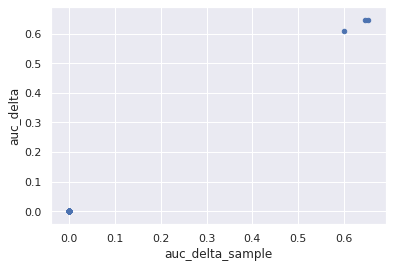

In [9]:
summary[:115].plot(x='auc_delta_sample', y='auc_delta', kind='scatter')

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


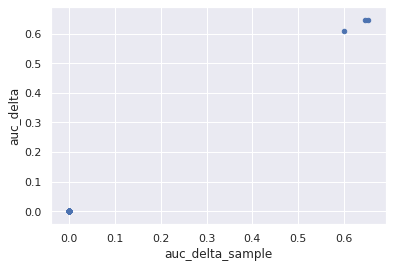

In [10]:
summary[:115].plot(x='auc_delta_sample', y='auc_delta', kind='scatter')

In [13]:
#summary.to_csv('Rank_Summary_Data.csv')

In [ ]:
#pd.read_csv('Rank_Summary_Data.csv', index_col=0)